In [1]:
%ls zippedData

 Volume in drive C has no label.
 Volume Serial Number is 1658-7586

 Directory of c:\Users\DJ\OneDrive - Zero Eyes\DJ\Flatiron\phase_1\project\Microsoft_Studio_Analysis_Phase_1\zippedData

01/23/2023  07:30 PM    <DIR>          .
01/26/2023  10:08 AM    <DIR>          ..
01/23/2023  07:30 PM            53,544 bom.movie_gross.csv.gz
01/22/2023  06:53 PM    <DIR>          im.db
01/23/2023  07:30 PM        67,149,708 im.db.zip
01/23/2023  07:30 PM           498,202 rt.movie_info.tsv.gz
01/23/2023  07:30 PM         3,402,194 rt.reviews.tsv.gz
01/23/2023  07:30 PM           827,840 tmdb.movies.csv.gz
01/23/2023  07:30 PM           153,218 tn.movie_budgets.csv.gz
               6 File(s)     72,084,706 bytes
               3 Dir(s)  381,835,403,264 bytes free


In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 40})
%matplotlib inline

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
movies = pd.read_csv('zippedData\\tmdb.movies.csv.gz')

In [5]:
movie_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')

In [6]:
print(movies.columns, movie_budgets.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object') Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [7]:
masterdf = movie_budgets.merge(movies, how='inner', left_on='movie', right_on='title', suffixes=('_budgets', '_movies'))

In [8]:
conn = sqlite3.connect('zippedData\im.db\im.db')

In [9]:
basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    """, conn )

In [10]:
new_masterdf = masterdf.merge(basics_and_ratings, how='inner', left_on='movie', right_on='primary_title', suffixes=('_master','_database')).drop_duplicates(subset='movie')

In [11]:
new_masterdf.drop(['id_movies', 'Unnamed: 0', 'original_title_database', 'movie_id', 'primary_title', 'title','release_date_budgets', 'vote_count', 'vote_average', 'popularity', 'id_budgets','start_year', 'original_title_master', 'original_language', 'genres' ], axis=1, inplace=True)

In [12]:
def remove_dollarsigncommas(data, column):
    data[column] = data[column].str.replace(',','')
    data[column] = data[column].str.replace('$','')
    return print('all done') ; print(data[column].head())

In [13]:
remove_dollarsigncommas(new_masterdf, 'production_budget')
remove_dollarsigncommas(new_masterdf, 'worldwide_gross')
remove_dollarsigncommas(new_masterdf, 'domestic_gross')

all done
all done
all done


In [14]:
new_masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 4549
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                1789 non-null   object 
 1   production_budget    1789 non-null   object 
 2   domestic_gross       1789 non-null   object 
 3   worldwide_gross      1789 non-null   object 
 4   genre_ids            1789 non-null   object 
 5   release_date_movies  1789 non-null   object 
 6   runtime_minutes      1739 non-null   float64
 7   averagerating        1714 non-null   float64
 8   numvotes             1714 non-null   float64
dtypes: float64(3), object(6)
memory usage: 139.8+ KB


In [15]:
new_masterdf[['production_budget', 'domestic_gross', 'worldwide_gross']] = new_masterdf[['production_budget', 'domestic_gross', 'worldwide_gross']].applymap(lambda x: int(x))

In [16]:
new_masterdf['release_month'] = new_masterdf['release_date_movies'].map(lambda x: x[5:7])

In [17]:
new_masterdf

,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_movies,runtime_minutes,averagerating,numvotes,release_month
0,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",2009-12-18,93.00000,6.10000,43.00000,12
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",2011-05-20,136.00000,6.60000,447624.00000,05
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",2015-05-01,141.00000,7.30000,665594.00000,05
3,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",2018-04-27,149.00000,8.50000,670926.00000,04
4,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",2017-11-17,120.00000,6.50000,329135.00000,11
...,...,...,...,...,...,...,...,...,...,...
4541,Exeter,25000,0,489792,"[53, 27]",2015-03-26,91.00000,4.50000,5156.00000,03
4544,Ten,25000,0,0,"[12, 27, 9648, 53]",2014-03-28,118.00000,5.50000,31.00000,03
4547,Dry Spell,22000,0,0,"[35, 10749]",2013-02-14,90.00000,3.30000,120.00000,02
4548,All Superheroes Must Die,20000,0,0,"[878, 53]",2013-01-04,78.00000,4.00000,1977.00000,01


In [18]:
tmdb_movie_genreIDs = {'genres':[{'id':28,'name':'Action'},
    {'id':12,'name':'Adventure'},
    {'id':16,'name':'Animation'},
    {'id':35,'name':'Comedy'},
    {'id':80,'name':'Crime'},
    {'id':99,'name':'Documentary'},
    {'id':18,'name':'Drama'},
    {'id':10751,'name':'Family'},
    {'id':14,'name':'Fantasy'},
    {'id':36,'name':'History'},
    {'id':27,'name':'Horror'},
    {'id':10402,'name':'Music'},
    {'id':9648,'name':'Mystery'},
    {'id':10749,'name':'Romance'},
    {'id':878,'name':'Science Fiction'},
    {'id':10770,'name':'TV Movie'},
    {'id':53,'name':'Thriller'},
    {'id':10752,'name':'War'},
    {'id':37,'name':'Western'}]}

In [19]:
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('28', 'Action')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('12', 'Adventure')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('16', 'Animation')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('35', 'Comedy')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('80', 'Crime')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('99', 'Documentary')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('18', 'Drama')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10751', 'Family')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('14', 'Fantasy')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('36', 'History')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('27', 'Horror')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10402', 'Music')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('9648', 'Mystery')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10749', 'Romance')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('878', 'Science Fiction')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10770', 'TV Movie')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('53', 'Thriller')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10752', 'War')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('37', 'Western')

In [20]:
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].map(lambda x: x.lstrip('[').rstrip(']').split(','))

In [21]:
new_masterdf.reset_index(inplace=True)

In [22]:
final_df = new_masterdf.join(pd.DataFrame(new_masterdf.genre_ids.values.tolist()).add_prefix('genre_'), how='left', lsuffix='_votes')
final_df.drop('index', axis=1, inplace=True)
final_df.isna().sum()/len(final_df)

movie                 0.00000
production_budget     0.00000
domestic_gross        0.00000
worldwide_gross       0.00000
genre_ids             0.00000
release_date_movies   0.00000
runtime_minutes       0.02795
averagerating         0.04192
numvotes              0.04192
release_month         0.00000
genre_0               0.00000
genre_1               0.23812
genre_2               0.55115
genre_3               0.84572
genre_4               0.96534
genre_5               0.99329
genre_6               0.99944
dtype: float64

In [23]:
final_df.drop(['genre_6','genre_5','genre_4','genre_3', 'genre_2' ], axis=1, inplace=True)

In [24]:
final_df['worldwide_gross'].describe()

count         1789.00000
mean     122286157.08999
std      227256447.56779
min              0.00000
25%        3541565.00000
50%       37831658.00000
75%      126931325.00000
max     2776345279.00000
Name: worldwide_gross, dtype: float64

In [25]:
final_df = final_df[final_df['worldwide_gross'] > 3541565]
final_df

,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_movies,runtime_minutes,averagerating,numvotes,release_month,genre_0,genre_1
0,Avatar,425000000,760507625,2776345279,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-18,93.00000,6.10000,43.00000,12,Action,Adventure
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[Adventure, Action, Fantasy]",2011-05-20,136.00000,6.60000,447624.00000,05,Adventure,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Science Fiction]",2015-05-01,141.00000,7.30000,665594.00000,05,Action,Adventure
3,Avengers: Infinity War,300000000,678815482,2048134200,"[Adventure, Action, Fantasy]",2018-04-27,149.00000,8.50000,670926.00000,04,Adventure,Action
4,Justice League,300000000,229024295,655945209,"[Action, Adventure, Fantasy, Science Fiction]",2017-11-17,120.00000,6.50000,329135.00000,11,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Graduation Day,250000,23894000,23894000,[],2015-01-01,75.00000,5.00000,52.00000,01,,None
1723,Sleight,250000,3930990,3934450,"[Drama, Thriller, Action, Science Fiction]",2017-04-28,89.00000,5.90000,7074.00000,04,Drama,Thriller
1724,Like Crazy,250000,3395391,3728400,"[Drama, Romance]",2011-10-28,86.00000,6.70000,55841.00000,10,Drama,Romance
1725,Cube,250000,489220,8969065,[],2014-05-02,113.00000,nan,nan,05,,None


In [26]:
final_df['release_year'] = final_df['release_date_movies'].map(lambda x: int(x[:4]))

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1753
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                1341 non-null   object 
 1   production_budget    1341 non-null   int64  
 2   domestic_gross       1341 non-null   int64  
 3   worldwide_gross      1341 non-null   int64  
 4   genre_ids            1341 non-null   object 
 5   release_date_movies  1341 non-null   object 
 6   runtime_minutes      1308 non-null   float64
 7   averagerating        1290 non-null   float64
 8   numvotes             1290 non-null   float64
 9   release_month        1341 non-null   object 
 10  genre_0              1341 non-null   object 
 11  genre_1              1074 non-null   object 
 12  release_year         1341 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 146.7+ KB


In [28]:
final_df = final_df[final_df['release_year'] >= 2009]
final_df.shape

(1329, 13)

In [29]:
final_df['net_profits'] = final_df['worldwide_gross'] - final_df['production_budget']
final_df['profit_to_budget_ratio'] = final_df['net_profits'] / final_df['production_budget']
final_df

<ipython-input-29-06905da70f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['net_profits'] = final_df['worldwide_gross'] - final_df['production_budget']
<ipython-input-29-06905da70f3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['profit_to_budget_ratio'] = final_df['net_profits'] / final_df['production_budget']


,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_movies,runtime_minutes,averagerating,numvotes,release_month,genre_0,genre_1,release_year,net_profits,profit_to_budget_ratio
0,Avatar,425000000,760507625,2776345279,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-18,93.00000,6.10000,43.00000,12,Action,Adventure,2009,2351345279,5.53258
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[Adventure, Action, Fantasy]",2011-05-20,136.00000,6.60000,447624.00000,05,Adventure,Action,2011,635063875,1.54667
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Science Fiction]",2015-05-01,141.00000,7.30000,665594.00000,05,Action,Adventure,2015,1072413963,3.24384
3,Avengers: Infinity War,300000000,678815482,2048134200,"[Adventure, Action, Fantasy]",2018-04-27,149.00000,8.50000,670926.00000,04,Adventure,Action,2018,1748134200,5.82711
4,Justice League,300000000,229024295,655945209,"[Action, Adventure, Fantasy, Science Fiction]",2017-11-17,120.00000,6.50000,329135.00000,11,Action,Adventure,2017,355945209,1.18648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Graduation Day,250000,23894000,23894000,[],2015-01-01,75.00000,5.00000,52.00000,01,,None,2015,23644000,94.57600
1723,Sleight,250000,3930990,3934450,"[Drama, Thriller, Action, Science Fiction]",2017-04-28,89.00000,5.90000,7074.00000,04,Drama,Thriller,2017,3684450,14.73780
1724,Like Crazy,250000,3395391,3728400,"[Drama, Romance]",2011-10-28,86.00000,6.70000,55841.00000,10,Drama,Romance,2011,3478400,13.91360
1725,Cube,250000,489220,8969065,[],2014-05-02,113.00000,nan,nan,05,,None,2014,8719065,34.87626


In [30]:
(final_df.groupby('genre_0').count()/len(final_df)).sort_values('movie', ascending=False)

,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_movies,runtime_minutes,averagerating,numvotes,release_month,genre_1,release_year,net_profits,profit_to_budget_ratio
genre_0,,,,,,,,,,,,,,
Drama,0.23552,0.23552,0.23552,0.23552,0.23552,0.23552,0.23025,0.22649,0.22649,0.23552,0.15726,0.23552,0.23552,0.23552
Action,0.19338,0.19338,0.19338,0.19338,0.19338,0.19338,0.19037,0.18886,0.18886,0.19338,0.18962,0.19338,0.19338,0.19338
Comedy,0.17457,0.17457,0.17457,0.17457,0.17457,0.17457,0.17306,0.16780,0.16780,0.17457,0.11437,0.17457,0.17457,0.17457
Adventure,0.06245,0.06245,0.06245,0.06245,0.06245,0.06245,0.06245,0.06170,0.06170,0.06245,0.06170,0.06245,0.06245,0.06245
Horror,0.06020,0.06020,0.06020,0.06020,0.06020,0.06020,0.05944,0.05869,0.05869,0.06020,0.04515,0.06020,0.06020,0.06020
Thriller,0.05493,0.05493,0.05493,0.05493,0.05493,0.05493,0.05117,0.05342,0.05342,0.05493,0.04816,0.05493,0.05493,0.05493
Animation,0.03762,0.03762,0.03762,0.03762,0.03762,0.03762,0.03612,0.03612,0.03612,0.03762,0.03687,0.03762,0.03762,0.03762
Crime,0.03762,0.03762,0.03762,0.03762,0.03762,0.03762,0.03687,0.03687,0.03687,0.03762,0.03762,0.03762,0.03762,0.03762
Romance,0.02408,0.02408,0.02408,0.02408,0.02408,0.02408,0.02408,0.02333,0.02333,0.02408,0.02333,0.02408,0.02408,0.02408


In [31]:
final_df= final_df.loc[final_df['genre_0'] != 'TV Movie']
final_df= final_df.loc[final_df['genre_0'] != 'Western']
final_df= final_df.loc[final_df['genre_0'] != 'Music']
final_df= final_df.loc[final_df['genre_0'] != 'War']
final_df= final_df.loc[final_df['genre_0'] != 'History']
final_df= final_df.loc[final_df['genre_0'] != 'Mystery']

In [32]:
final_df.shape

(1290, 15)

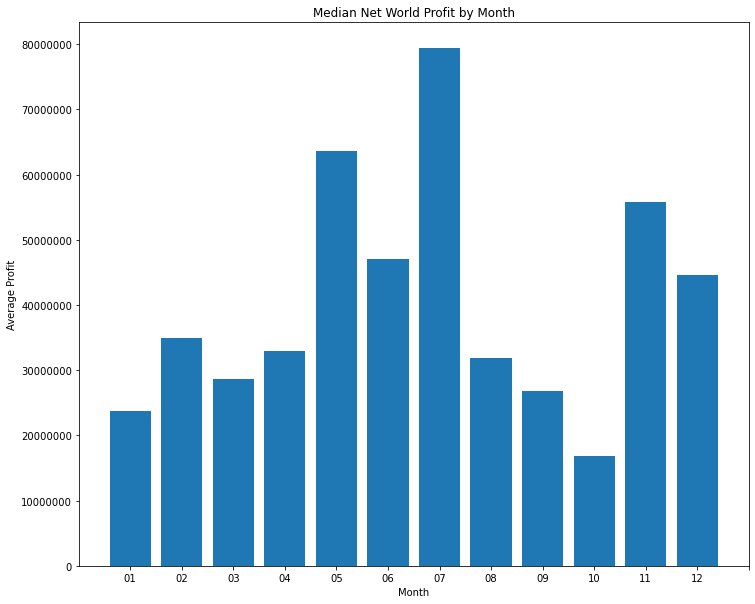

In [33]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Median Net World Profit by Month')
ax.bar(
     final_df.groupby('release_month').median().index,
     final_df.groupby('release_month').median()['net_profits']
    )

ax.set_ylabel('Average Profit')
ax.set_xlabel('Month')
ax.set_xticks(range(13))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

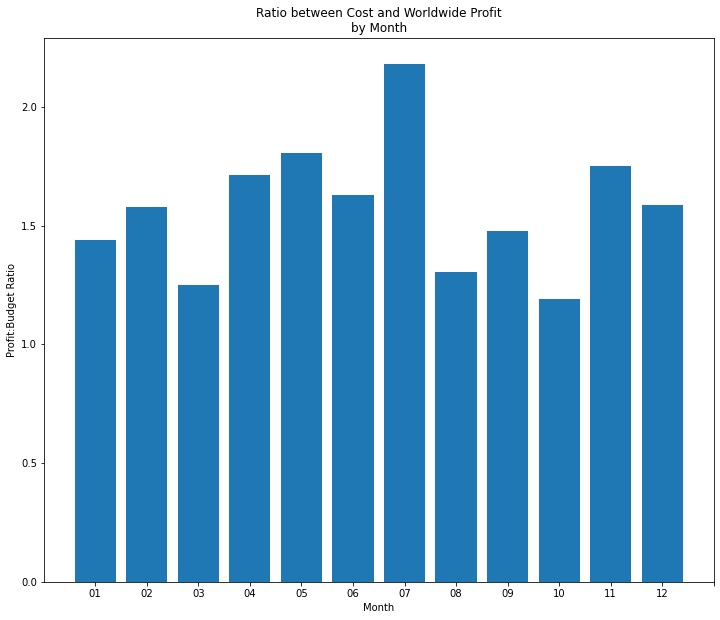

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Ratio between Cost and Worldwide Profit\nby Month')
ax.bar(
     final_df.groupby('release_month').median().index,
     final_df.groupby('release_month').median()['profit_to_budget_ratio'])

ax.set_ylabel('Profit:Budget Ratio')
ax.set_xlabel('Month')
ax.set_xticks(range(13))
plt.show()

In [35]:
sortgenres = final_df.groupby('genre_0').median()
sortgenres.sort_values('worldwide_gross', ascending=False)

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
genre_0,,,,,,,,,
Animation,80000000.00000,107514024.00000,272099539.50000,95.50000,6.80000,74214.50000,2013.00000,162347671.50000,1.89767
Adventure,95000000.00000,80069458.00000,215098356.00000,109.00000,6.45000,91149.50000,2015.00000,122344255.00000,1.61933
Fantasy,60000000.00000,54858851.00000,162502774.00000,102.00000,6.00000,97654.50000,2013.00000,50818912.00000,1.29948
Action,63000000.00000,56117548.00000,150422946.00000,111.00000,6.40000,131043.00000,2014.00000,85569212.00000,1.43292
Science Fiction,84000000.00000,62116418.00000,143735423.00000,106.00000,6.60000,187884.50000,2013.00000,75544366.50000,1.72701
Family,38000000.00000,48275979.50000,81795562.00000,92.00000,6.35000,20381.00000,2014.00000,44007796.00000,1.89451
Crime,29000000.00000,31975243.00000,59049643.00000,112.00000,6.60000,93618.00000,2014.00000,33987337.50000,1.19840
Horror,10000000.00000,28369816.50000,57946309.00000,92.00000,5.75000,51482.50000,2014.00000,39902732.00000,4.23365
Comedy,22000000.00000,36796296.50000,55674516.00000,102.00000,6.20000,54421.00000,2013.00000,28276772.00000,1.57226


Text(0.5, 0, 'Genre')

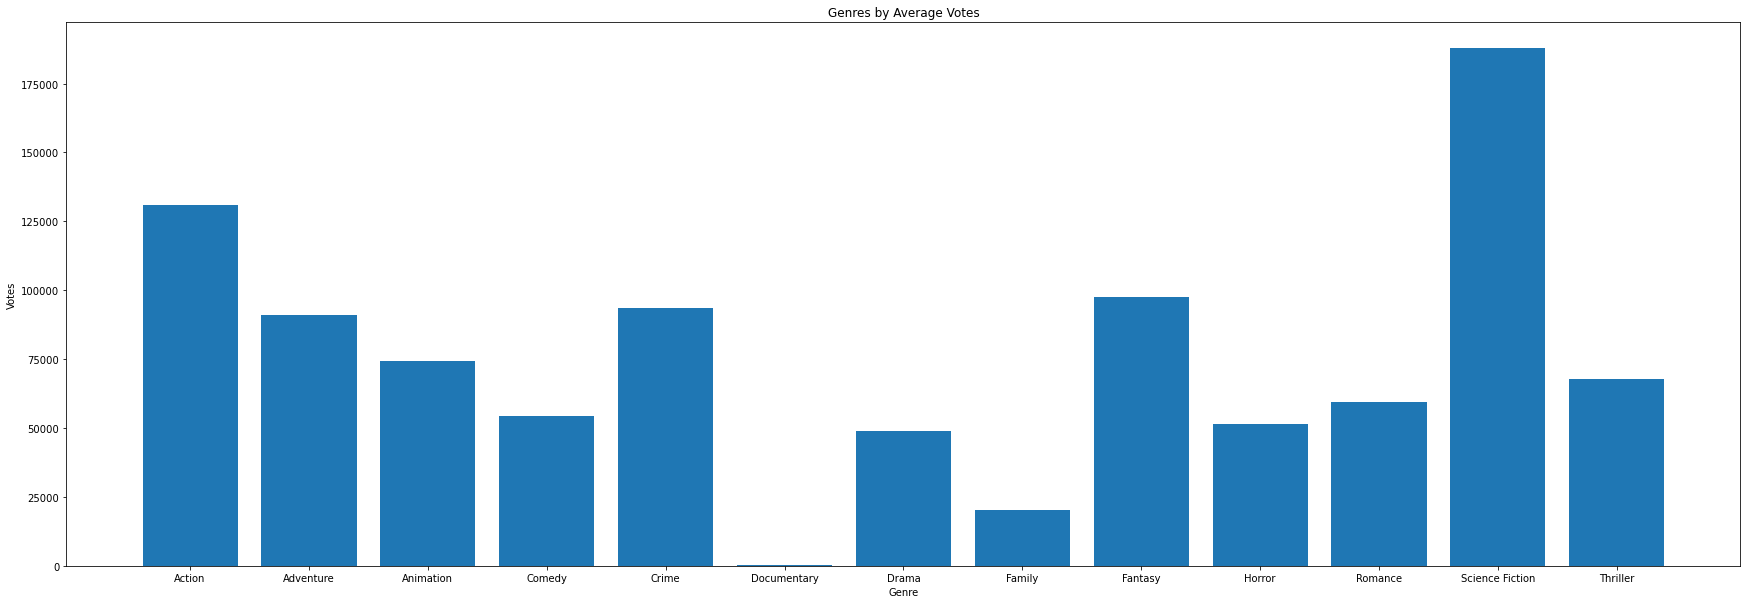

In [36]:
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title('Genres by Average Votes')
ax.bar( sortgenres.iloc[1:].index, sortgenres['numvotes'].iloc[1:]) #filtering out the blank genre row from the column
ax.set_ylabel('Votes')
ax.set_xlabel('Genre')

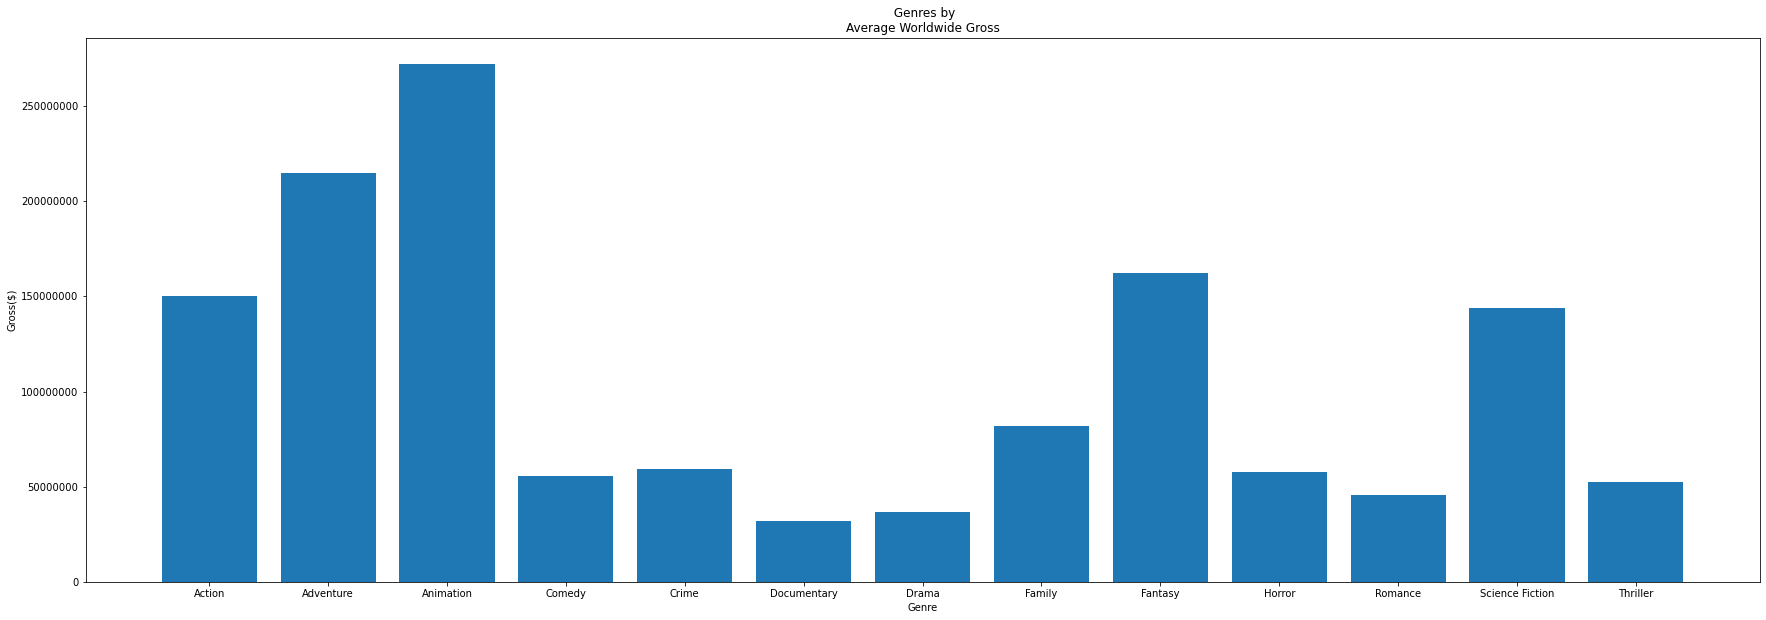

In [37]:
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title(' Genres by\nAverage Worldwide Gross')
ax.bar( sortgenres.iloc[1:].index, sortgenres['worldwide_gross'].iloc[1:]) #filtering out the blank genre row from the column
ax.set_ylabel('Gross($)')
ax.set_xlabel('Genre')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

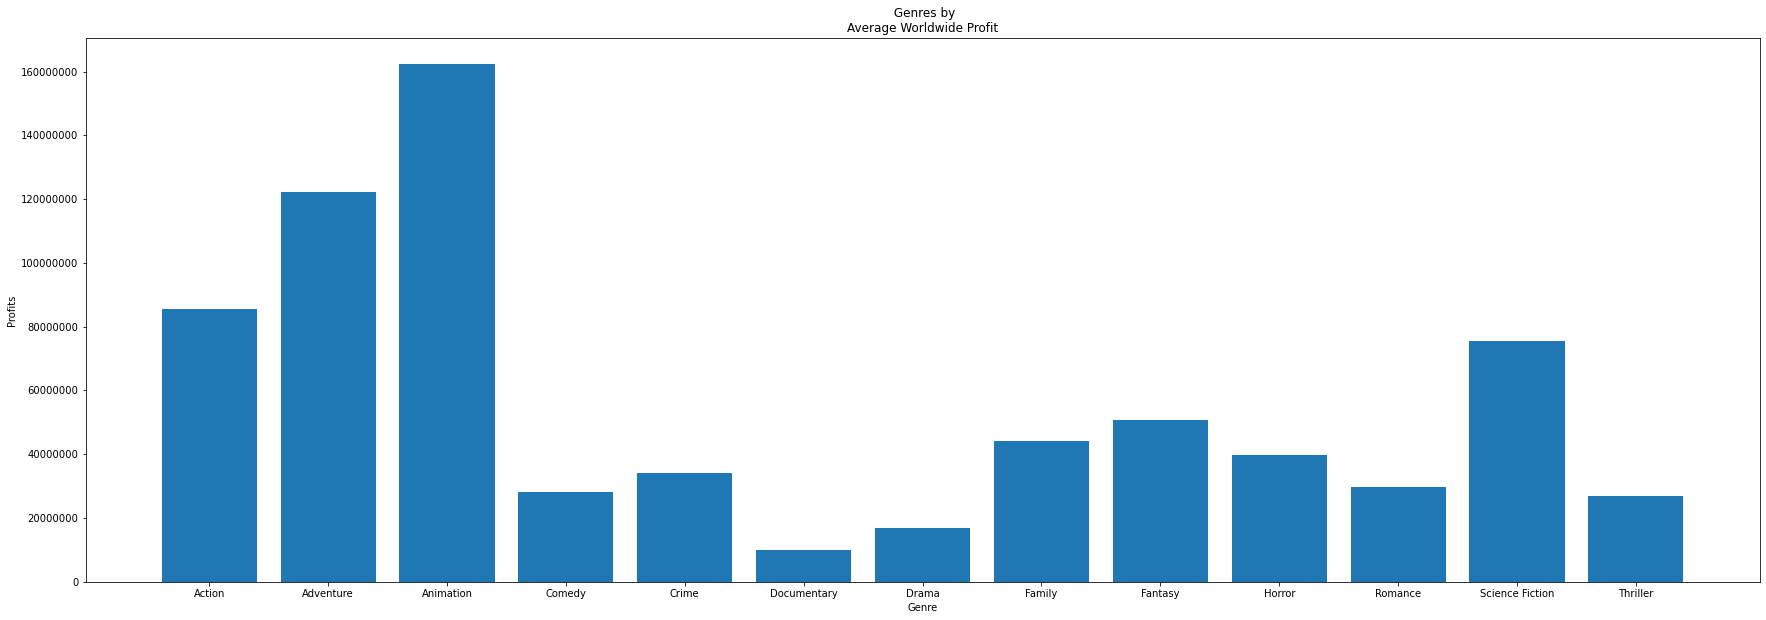

In [38]:
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title(' Genres by\nAverage Worldwide Profit')
ax.bar( sortgenres.iloc[1:].index, sortgenres['net_profits'].iloc[1:]) #filtering out the blank genre row from the column
ax.set_ylabel('Profits')
ax.set_xlabel('Genre')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

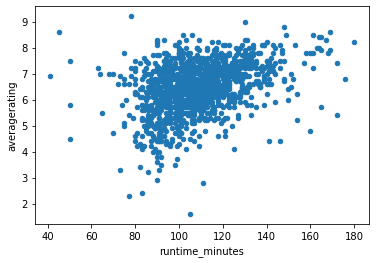

In [39]:
final_df.plot.scatter('runtime_minutes', 'averagerating')

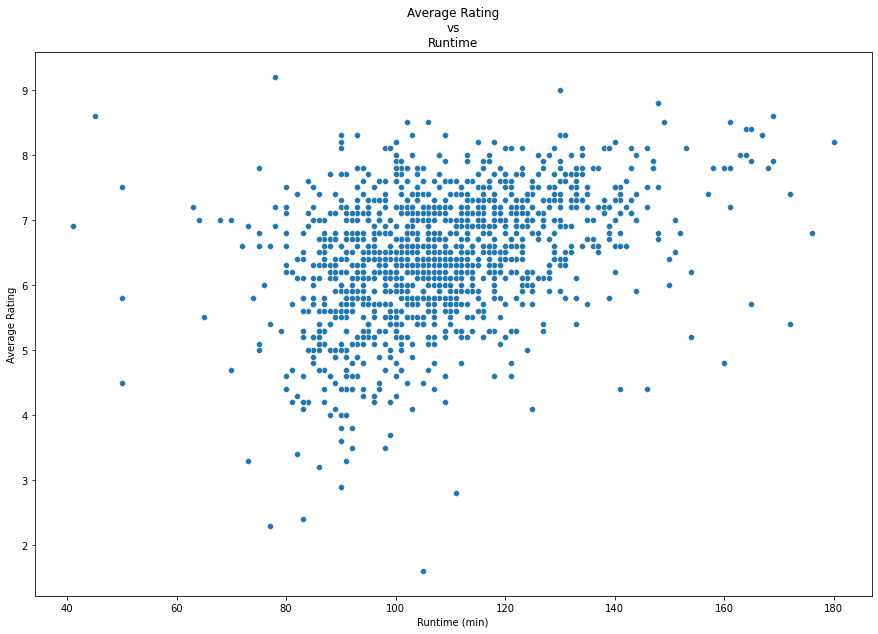

In [40]:
fig, ax = plt.subplots(figsize= (15, 10))
sns.scatterplot(x=final_df['runtime_minutes'], y=final_df['averagerating'])
ax.set_title('Average Rating\nvs\nRuntime')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Runtime (min)')
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='production_budget'>

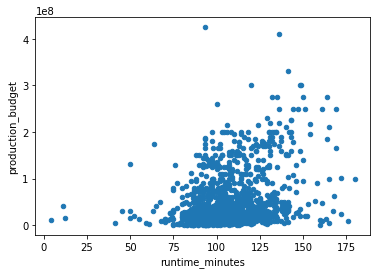

In [41]:
final_df.plot.scatter('runtime_minutes', 'production_budget')

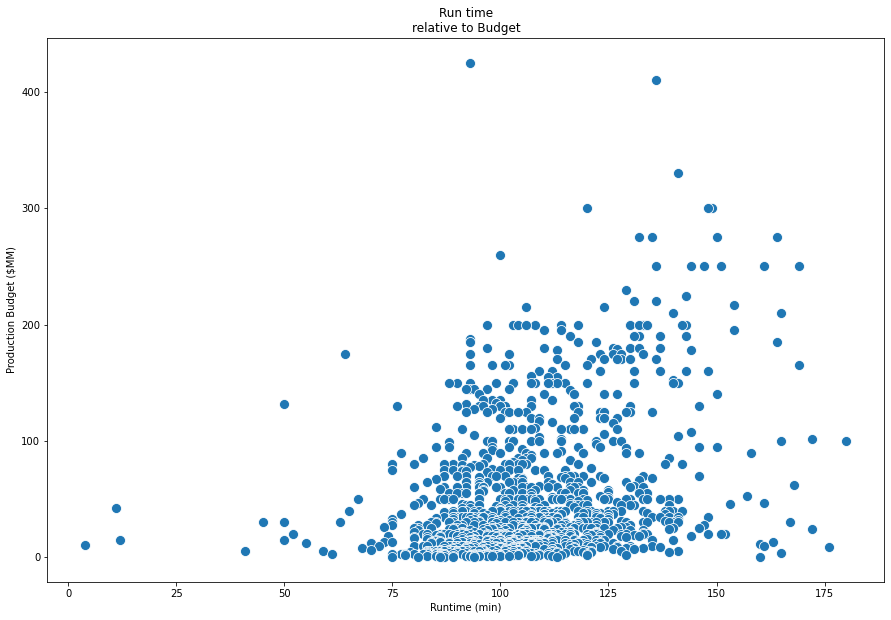

In [42]:
fig, ax = plt.subplots(figsize= (15,10))
sns.scatterplot(x=final_df['runtime_minutes'], y=final_df['production_budget']/1e6, s=100)
ax.set_title('Run time\nrelative to Budget')
ax.set_ylabel('Production Budget ($MM)')
ax.set_xlabel('Runtime (min)')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

##Evidence for 3

<AxesSubplot:xlabel='runtime_minutes', ylabel='profit_to_budget_ratio'>

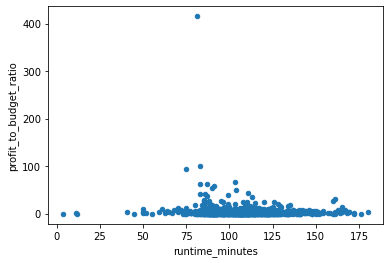

In [43]:
final_df.plot.scatter('runtime_minutes', 'profit_to_budget_ratio')

In [44]:
final_df['profit_to_budget_ratio'].describe()

count   1290.00000
mean       3.58442
std       13.52349
min       -0.88831
25%        0.37506
50%        1.53511
75%        3.45582
max      415.56474
Name: profit_to_budget_ratio, dtype: float64

In [45]:
final_df.loc[final_df['profit_to_budget_ratio'] == final_df['profit_to_budget_ratio'].max()]
graph_data = final_df.drop(1753)
graph_data.reset_index(inplace=True)
graph_data.shape

(1289, 16)

In [46]:
graph_data[graph_data['profit_to_budget_ratio'] == 100.75949]

,index,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_movies,runtime_minutes,averagerating,numvotes,release_month,genre_0,genre_1,release_year,net_profits,profit_to_budget_ratio
1265,1619,The Devil Inside,1000000,53262945,101759490,"[Thriller, Horror]",2012-01-06,83.00000,4.20000,33522.00000,01,Thriller,Horror,2012,100759490,100.75949


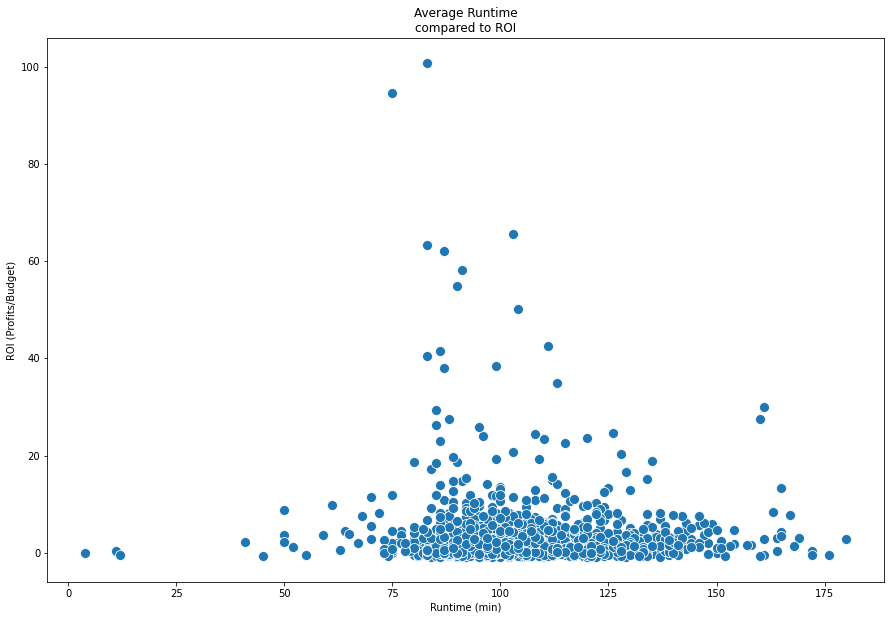

In [47]:
fig, ax = plt.subplots(figsize= (15,10))
sns.scatterplot(x=graph_data['runtime_minutes'], y=graph_data['profit_to_budget_ratio'], s=100) #dropping the gallows from this list b/c the data otherwise becomes unuseable and misconstrues it, making people believe that films get much higher returns than is accurate
ax.set_title('Average Runtime\ncompared to ROI')
ax.set_ylabel('ROI (Profits/Budget)')
ax.set_xlabel('Runtime (min)')
ax.ticklabel_format(style='plain', axis='y')
plt.show()
#Evidence for 3

<AxesSubplot:xlabel='runtime_minutes', ylabel='net_profits'>

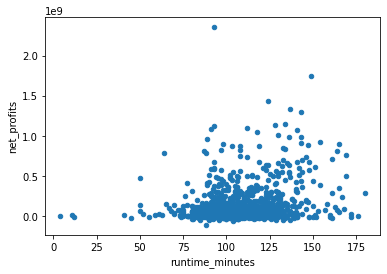

In [48]:
final_df.plot.scatter('runtime_minutes', 'net_profits')

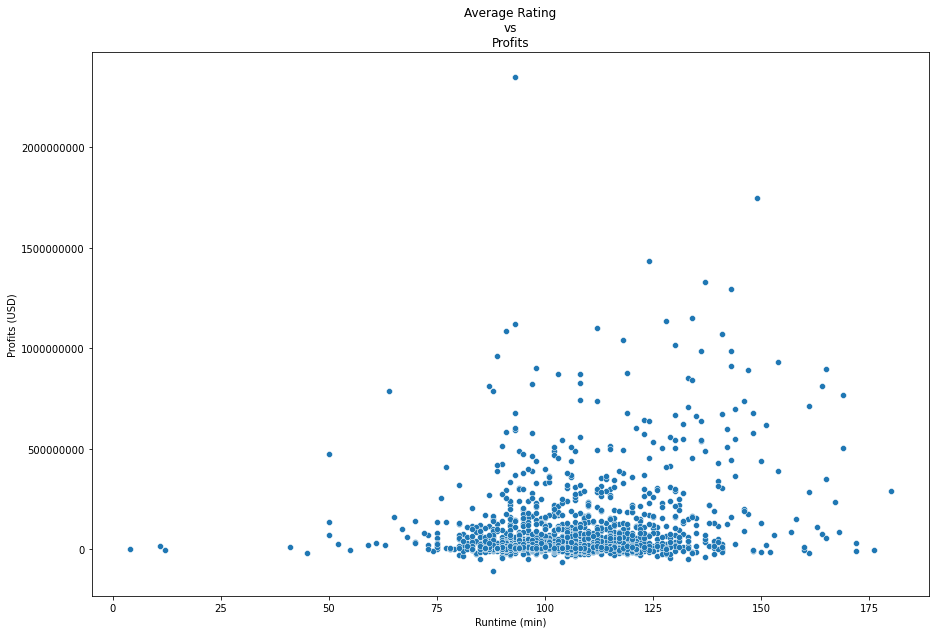

In [49]:
fig, ax = plt.subplots(figsize= (15,10))
sns.scatterplot(x=final_df['runtime_minutes'], y=final_df['net_profits'])
ax.set_title('Average Rating\nvs\nProfits')
ax.set_ylabel('Profits (USD)')
ax.set_xlabel('Runtime (min)')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='numvotes'>

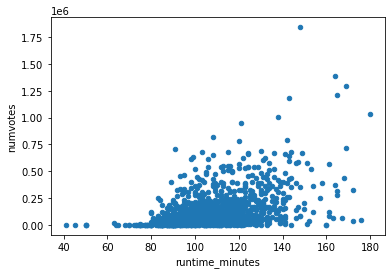

In [50]:
final_df.plot.scatter('runtime_minutes', 'numvotes')

In [51]:
labels = range(10)
values = pd.cut(final_df['runtime_minutes'], bins=30)
new_set = final_df.join(values, rsuffix='_values')
runtimegrouped = new_set.groupby('runtime_minutes_values').median()
runtimegrouped

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
runtime_minutes_values,,,,,,,,,
"(3.824, 9.867]",10100000.00000,10143618.00000,10143618.00000,4.00000,nan,nan,2014.00000,43618.00000,0.00432
"(9.867, 15.733]",28500000.00000,27087393.00000,33431578.50000,11.50000,nan,nan,2012.00000,4931578.50000,-0.01092
"(15.733, 21.6]",nan,nan,nan,nan,nan,nan,nan,nan,nan
"(21.6, 27.467]",nan,nan,nan,nan,nan,nan,nan,nan,nan
"(27.467, 33.333]",nan,nan,nan,nan,nan,nan,nan,nan,nan
"(33.333, 39.2]",nan,nan,nan,nan,nan,nan,nan,nan,nan
"(39.2, 45.067]",17500000.00000,5907339.00000,13306012.00000,43.00000,7.75000,205.00000,2014.00000,-4193988.00000,0.81980
"(45.067, 50.933]",30000000.00000,71628180.00000,148095566.00000,50.00000,5.80000,11.00000,2013.00000,133095566.00000,3.59725
"(50.933, 56.8]",16000000.00000,21336869.50000,25105671.50000,53.50000,nan,nan,2012.50000,9105671.50000,0.36450


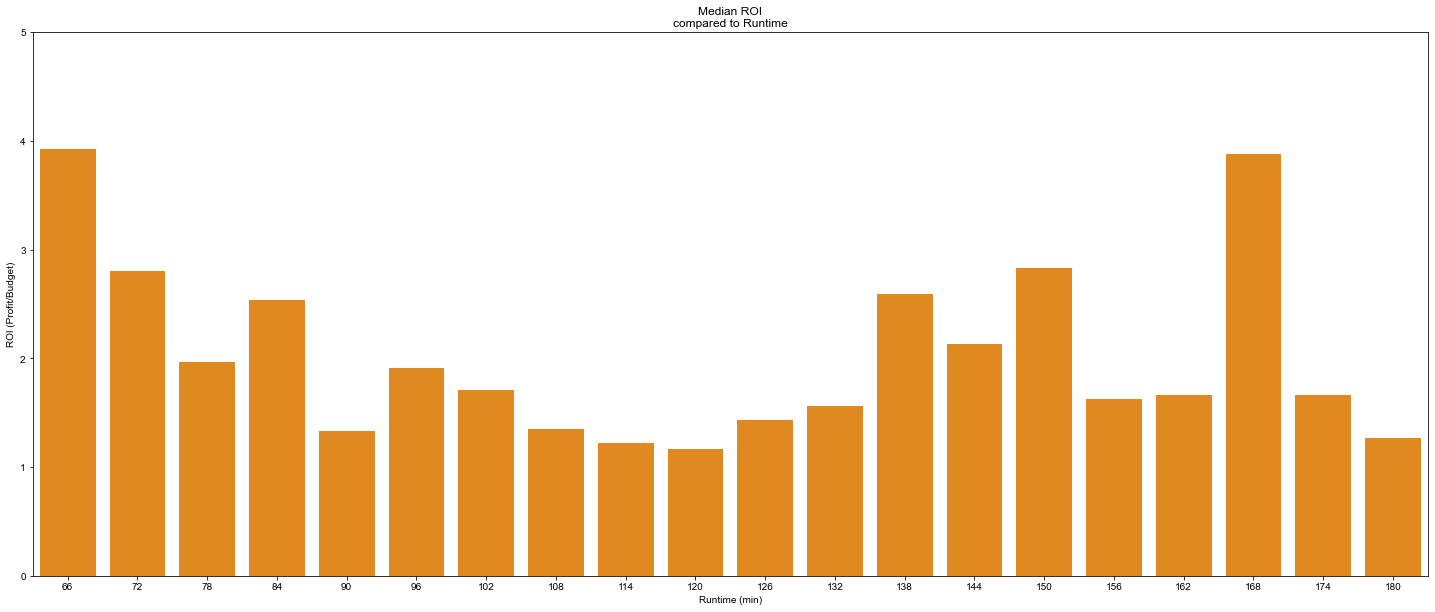

In [52]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=[(x+1)*6 for x in range(len(runtimegrouped))],
y=runtimegrouped['profit_to_budget_ratio'], color='darkorange',label='ROI (Profit/Budget)')
ax.set_ylim([0,5])
ax.set_xlim([9.5,29.5])#only looking at the top 75% of runtimes
ax.set_title('Median ROI\ncompared to Runtime')
# ax.legend(loc=2)
ax.set_ylabel('ROI (Profit/Budget)')
ax.set_xlabel('Runtime (min)')
sns.set_style("darkgrid")
plt.show()

<ipython-input-53-36c7e9c9c52b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


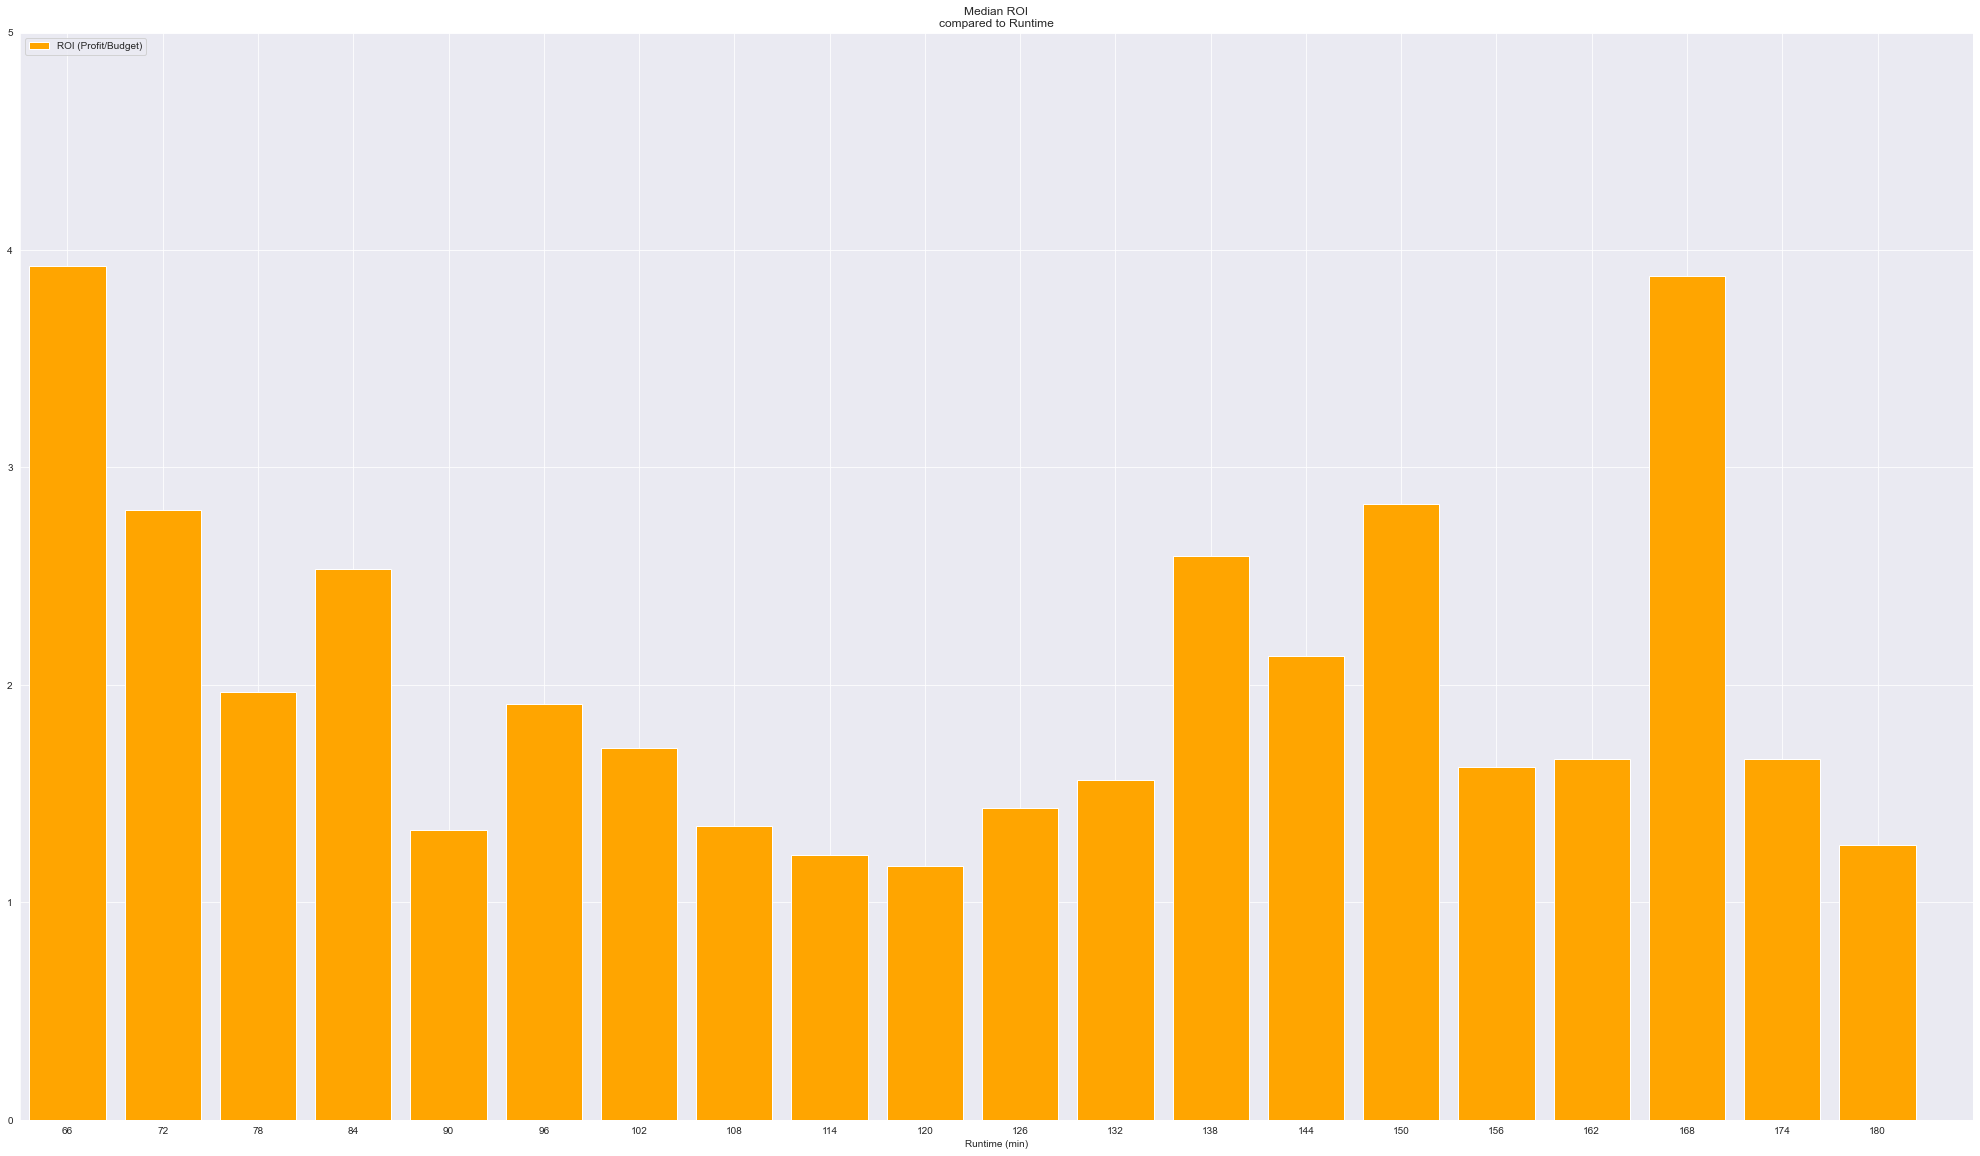

In [53]:
runtimeinfo = runtimegrouped['profit_to_budget_ratio']
indices = range(len(runtimegrouped))
genreinfo = [(x+1)*6 for x in range(len(runtimegrouped))]
# Calculate optimal width
fig, ax1 = plt.subplots(figsize=(35,20))
ax1.bar(indices,runtimeinfo,color='orange', label='ROI (Profit/Budget)')
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Runtime (min)')
# ax1.set_ylabel('Average Worldwide Gross')
ax1.set_xticks(indices)
ax1.set_title('Median ROI\ncompared to Runtime')
ax1.legend(loc=2)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim([0,5])
ax1.set_xlim([9.5,30])#only looking at the top 75% of runtimes
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='numvotes'>

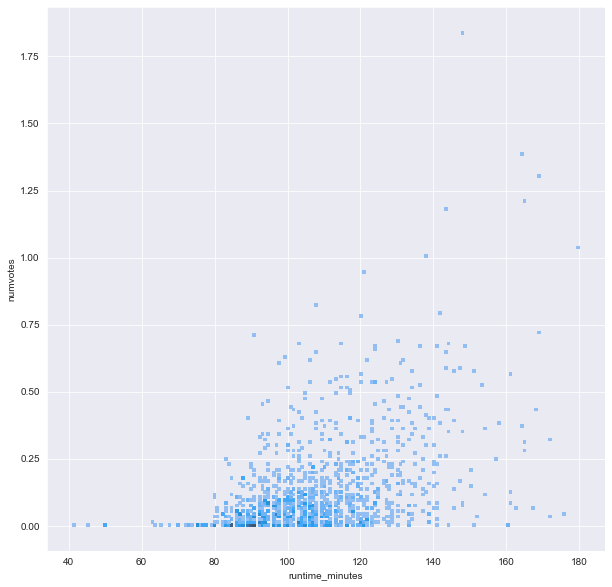

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(x=final_df['runtime_minutes'], y=final_df['numvotes']/1e6, bins=180)

In [55]:
final_df['runtime_minutes'].max()

180.0

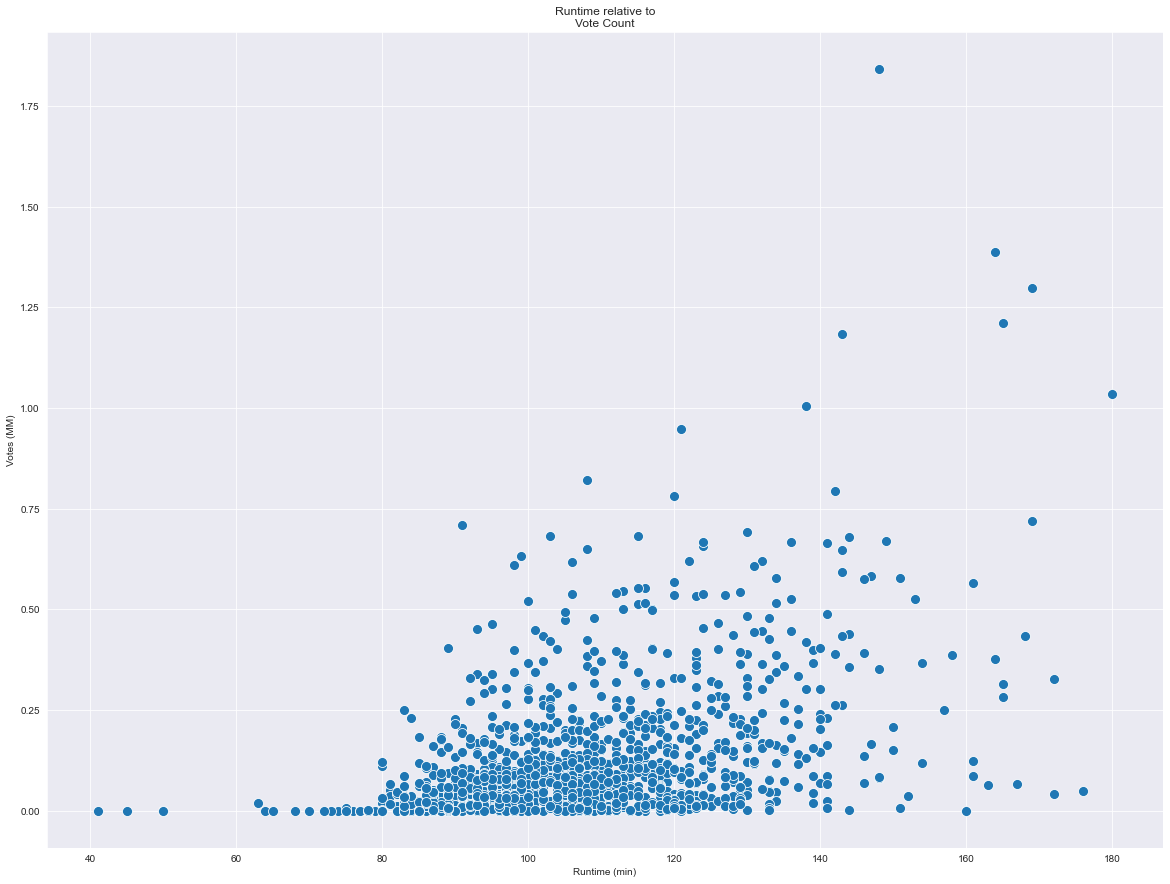

In [56]:
fig, ax = plt.subplots(figsize= (20,15))
sns.scatterplot(x=final_df['runtime_minutes'], y=final_df['numvotes']/1e6,s=100)
ax.set_title('Runtime relative to\nVote Count')
ax.set_ylabel('Votes (MM)')
ax.set_xlabel('Runtime (min)')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-57-38ac25302a9d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


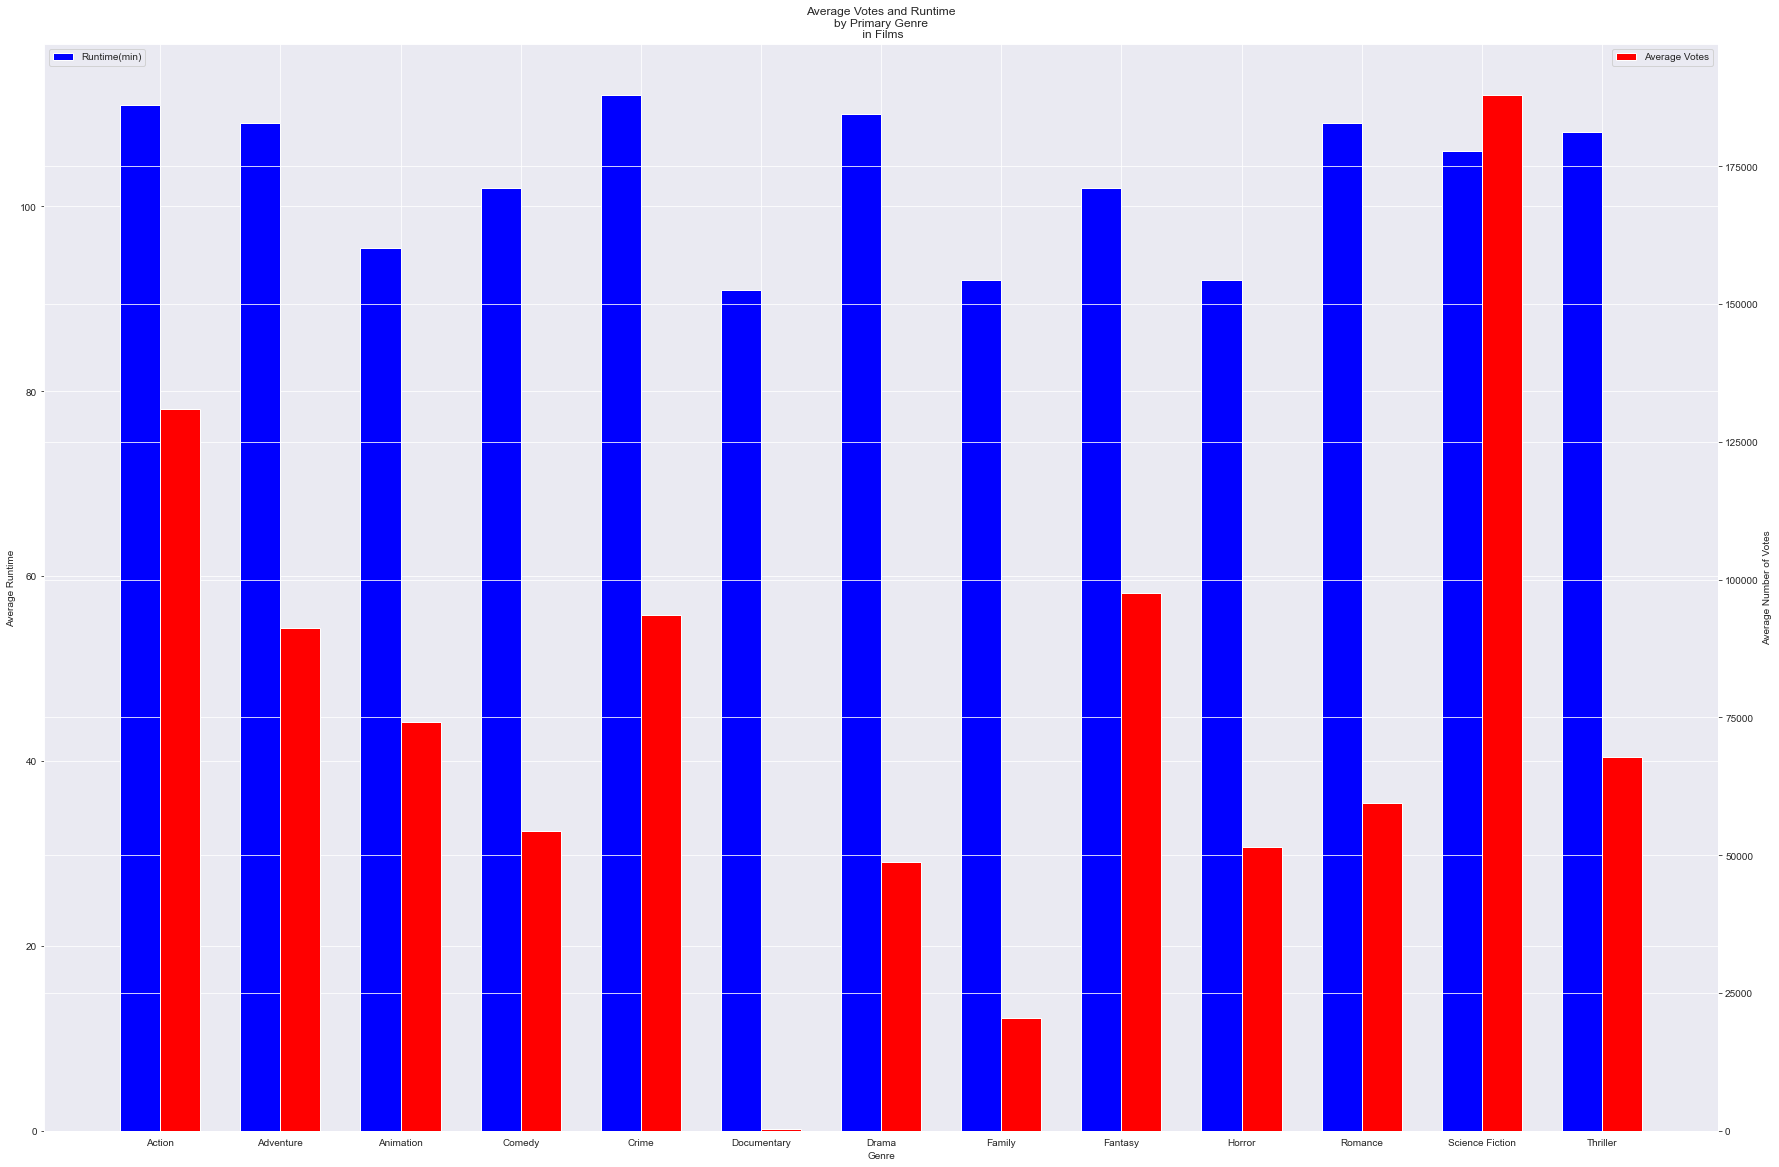

In [57]:
runtimeinfo = sortgenres['runtime_minutes'][1:]
numvoteinfo = sortgenres['numvotes'][1:]
indices = range(len(sortgenres[1:]))
genreinfo = sortgenres[1:].index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Runtime(min)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Runtime')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Runtime\nby Primary Genre\n in Films')
ax1.legend(loc=2)
ax2.legend(loc=0)
plt.show()

<ipython-input-58-ce1987628918>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


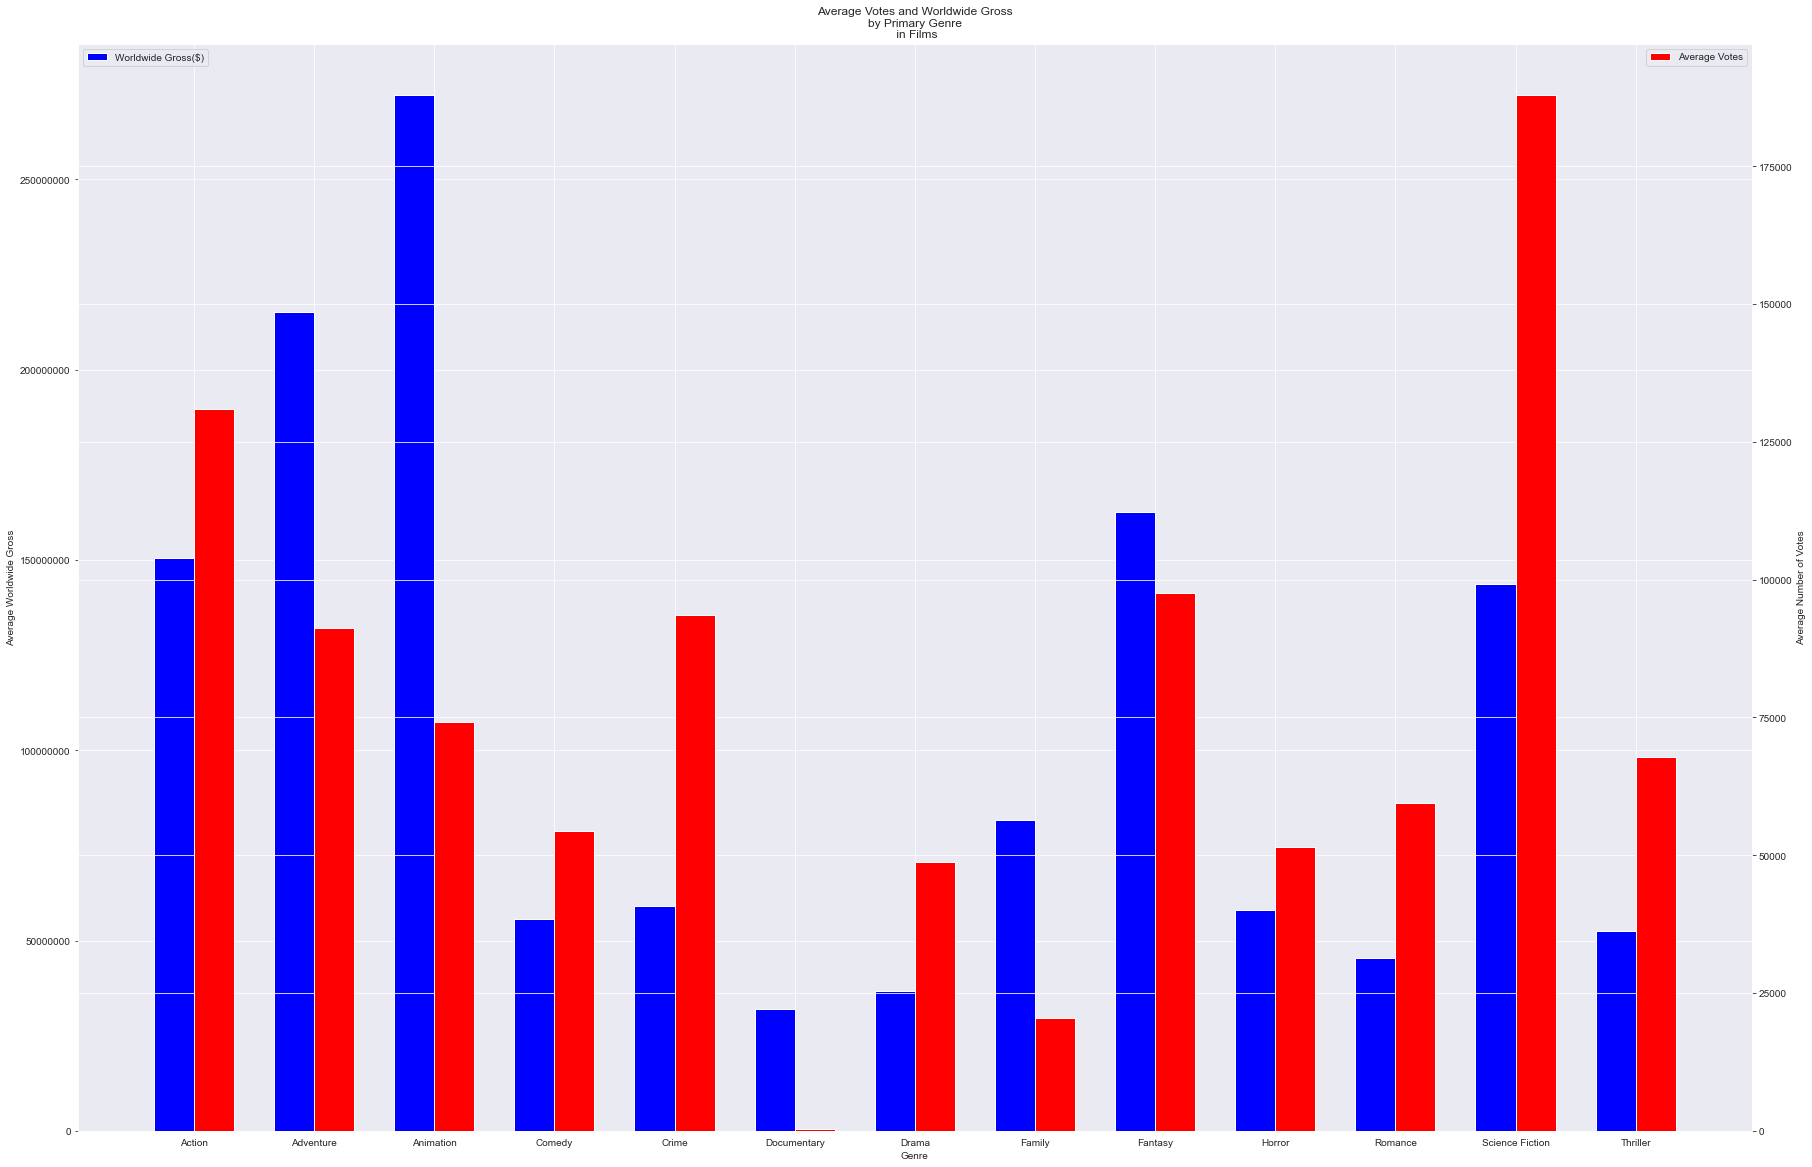

In [58]:
runtimeinfo = sortgenres['worldwide_gross'][1:]
numvoteinfo = sortgenres['numvotes'][1:]
indices = range(len(sortgenres[1:]))
genreinfo = sortgenres[1:].index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Worldwide Gross($)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Worldwide Gross')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Gross\nby Primary Genre\n in Films')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-59-ce1987628918>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


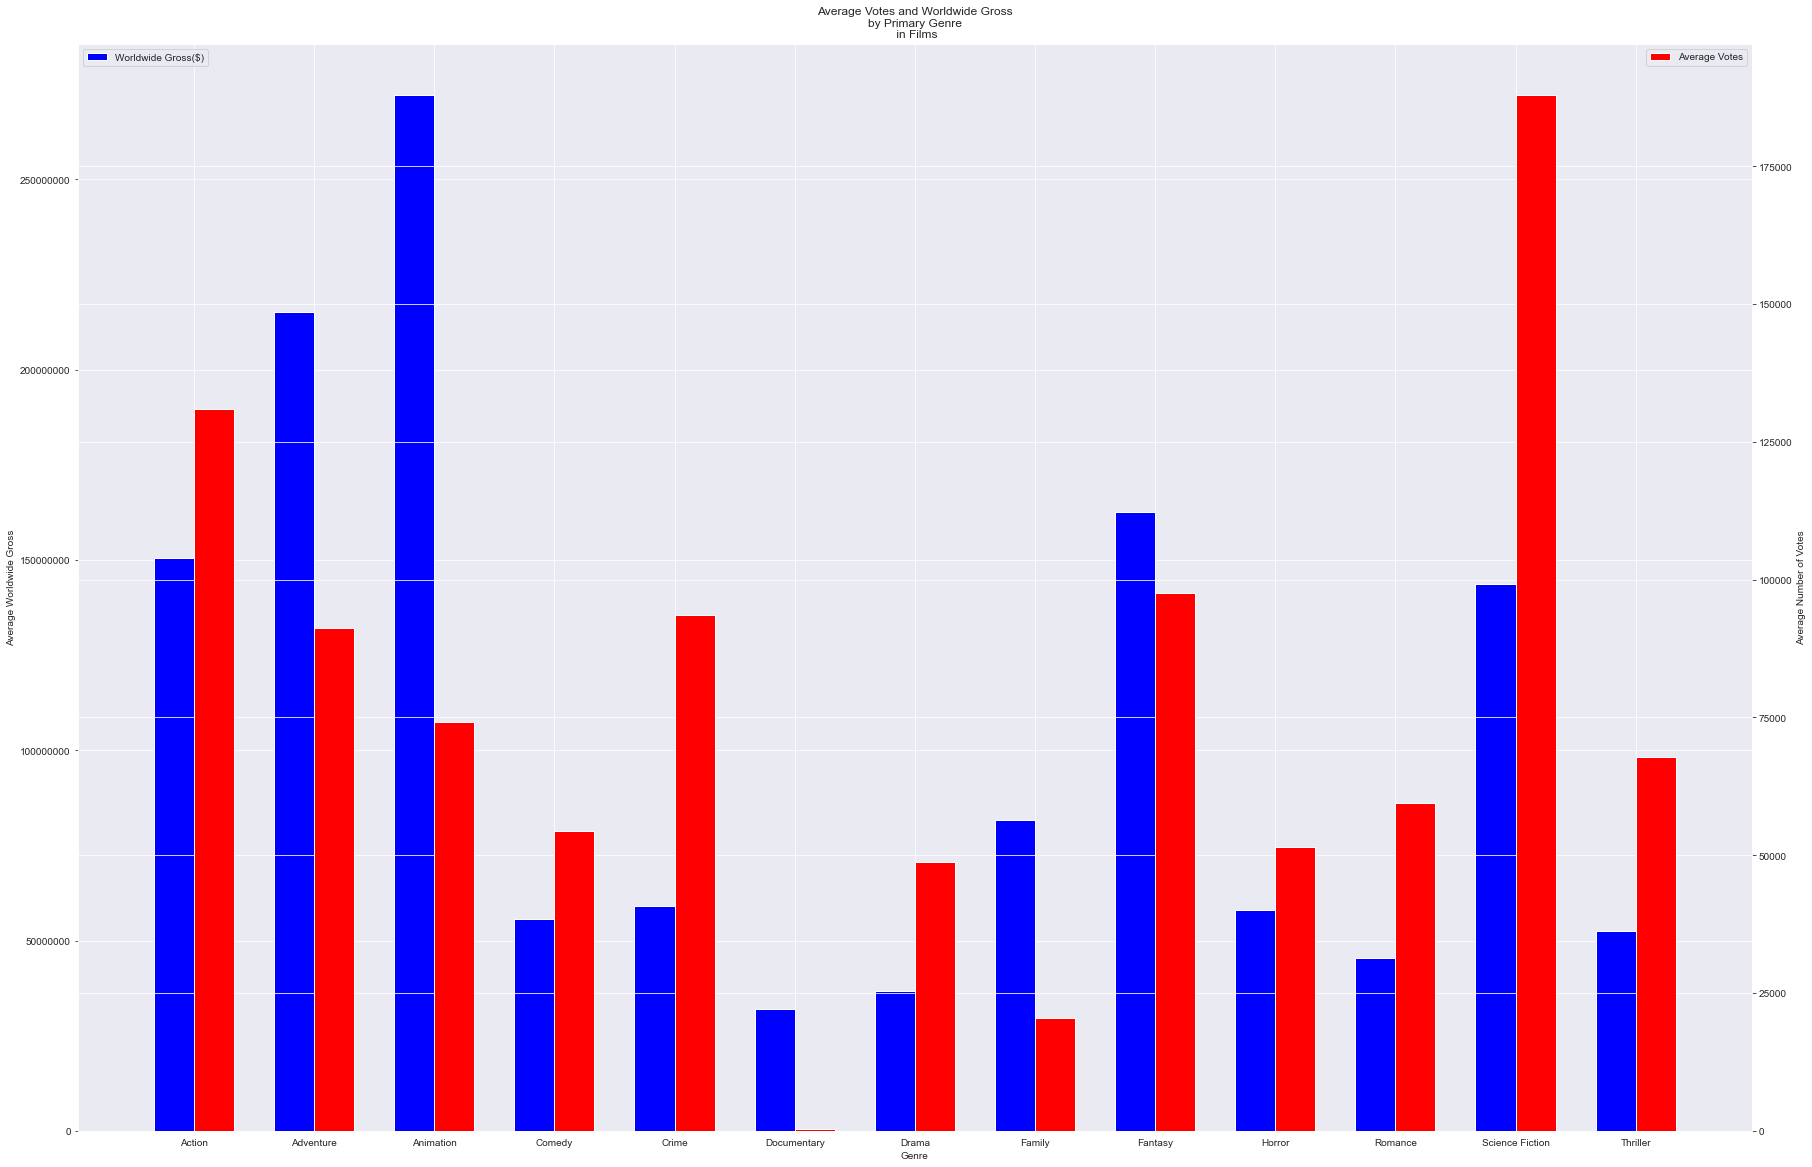

In [59]:
runtimeinfo = sortgenres['worldwide_gross'][1:]
numvoteinfo = sortgenres['numvotes'][1:]
indices = range(len(sortgenres[1:]))
genreinfo = sortgenres[1:].index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Worldwide Gross($)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Worldwide Gross')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Gross\nby Primary Genre\n in Films')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
plt.show()

In [60]:
sortgenres.sort_values('worldwide_gross', ascending=False).head()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
genre_0,,,,,,,,,
Animation,80000000.00000,107514024.00000,272099539.50000,95.50000,6.80000,74214.50000,2013.00000,162347671.50000,1.89767
Adventure,95000000.00000,80069458.00000,215098356.00000,109.00000,6.45000,91149.50000,2015.00000,122344255.00000,1.61933
Fantasy,60000000.00000,54858851.00000,162502774.00000,102.00000,6.00000,97654.50000,2013.00000,50818912.00000,1.29948
Action,63000000.00000,56117548.00000,150422946.00000,111.00000,6.40000,131043.00000,2014.00000,85569212.00000,1.43292
Science Fiction,84000000.00000,62116418.00000,143735423.00000,106.00000,6.60000,187884.50000,2013.00000,75544366.50000,1.72701


<ipython-input-61-ffadb5c0fe3e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


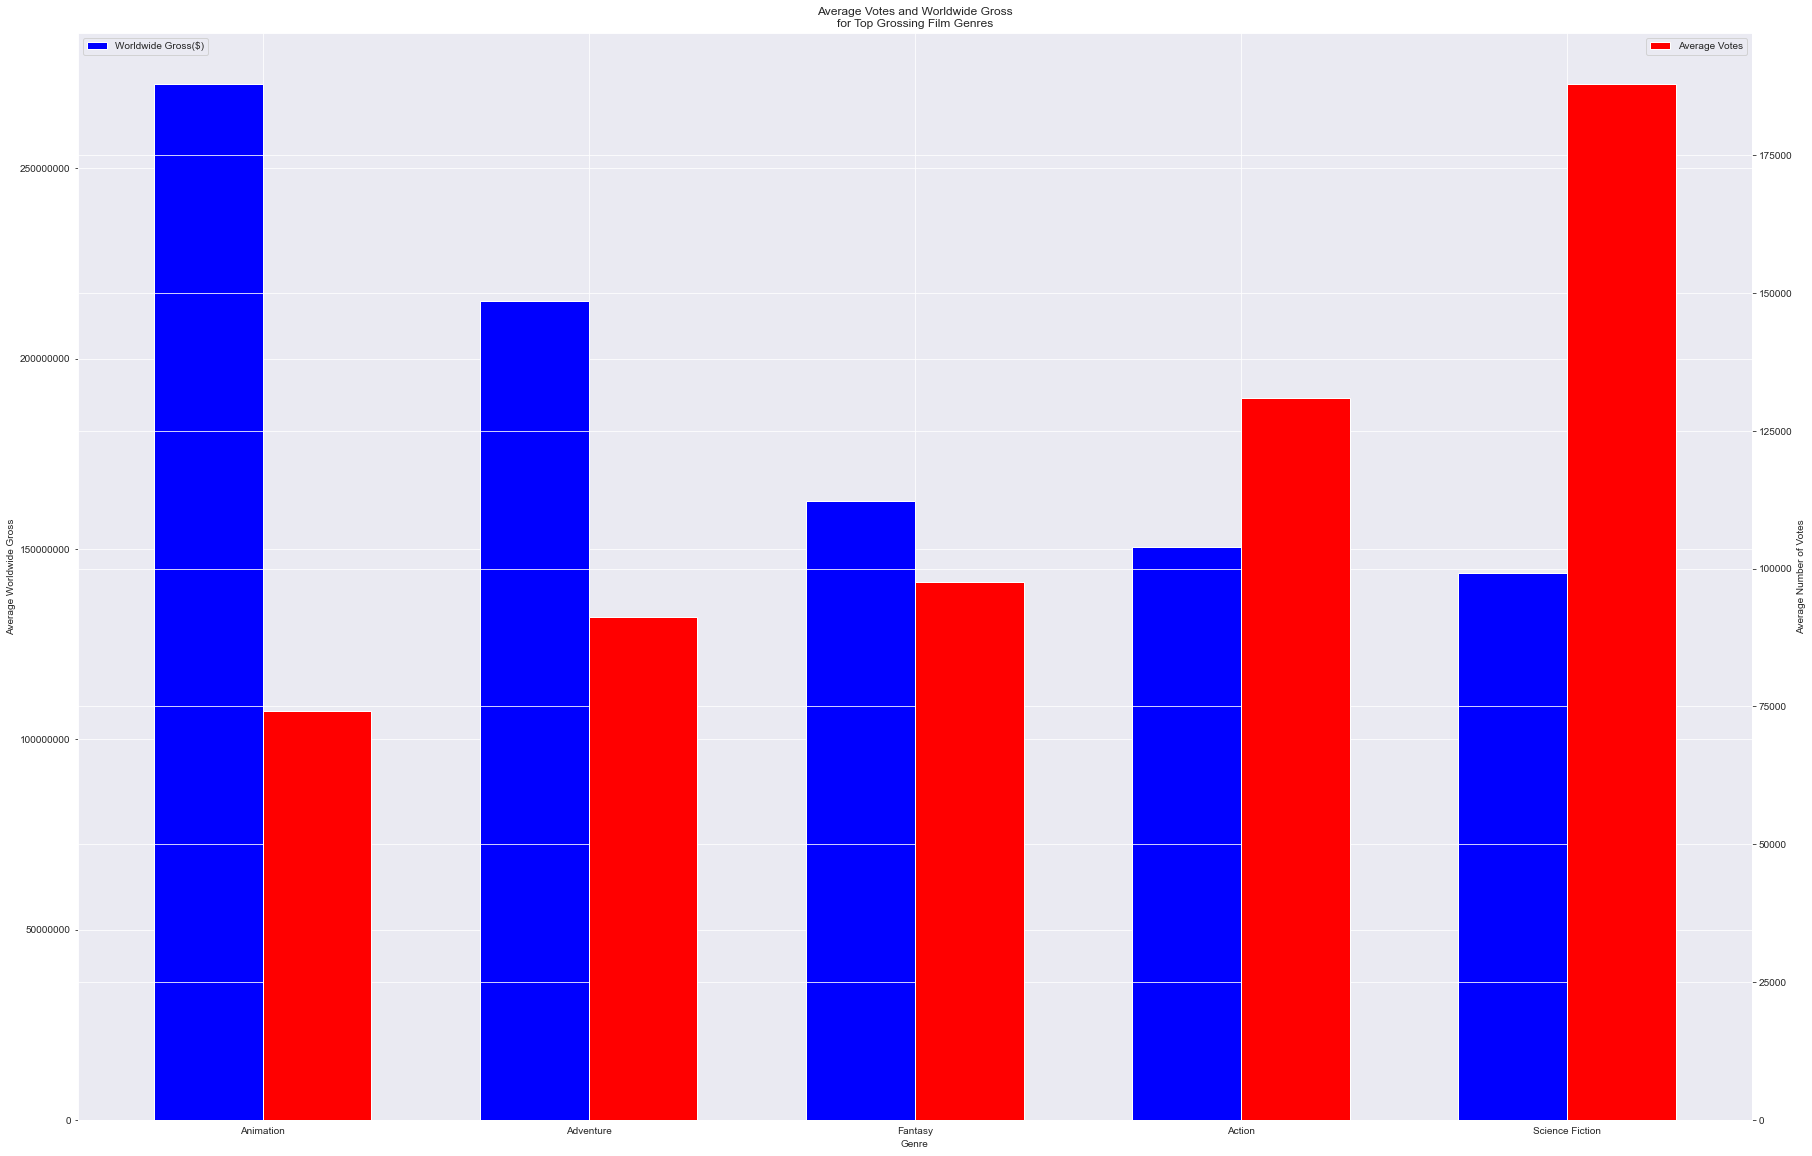

In [61]:
topfivegenresbywwgross = sortgenres.sort_values('worldwide_gross', ascending=False).head() #filtering to 
runtimeinfo = topfivegenresbywwgross['worldwide_gross']
numvoteinfo = topfivegenresbywwgross['numvotes']
indices = range(len(topfivegenresbywwgross))
genreinfo = topfivegenresbywwgross.index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Worldwide Gross($)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Worldwide Gross')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Gross\nfor Top Grossing Film Genres')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
plt.show()

In [62]:
topfivegenresbywwgross = sortgenres.sort_values('worldwide_gross', ascending=False).head()


<ipython-input-91-092e6b05b346>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


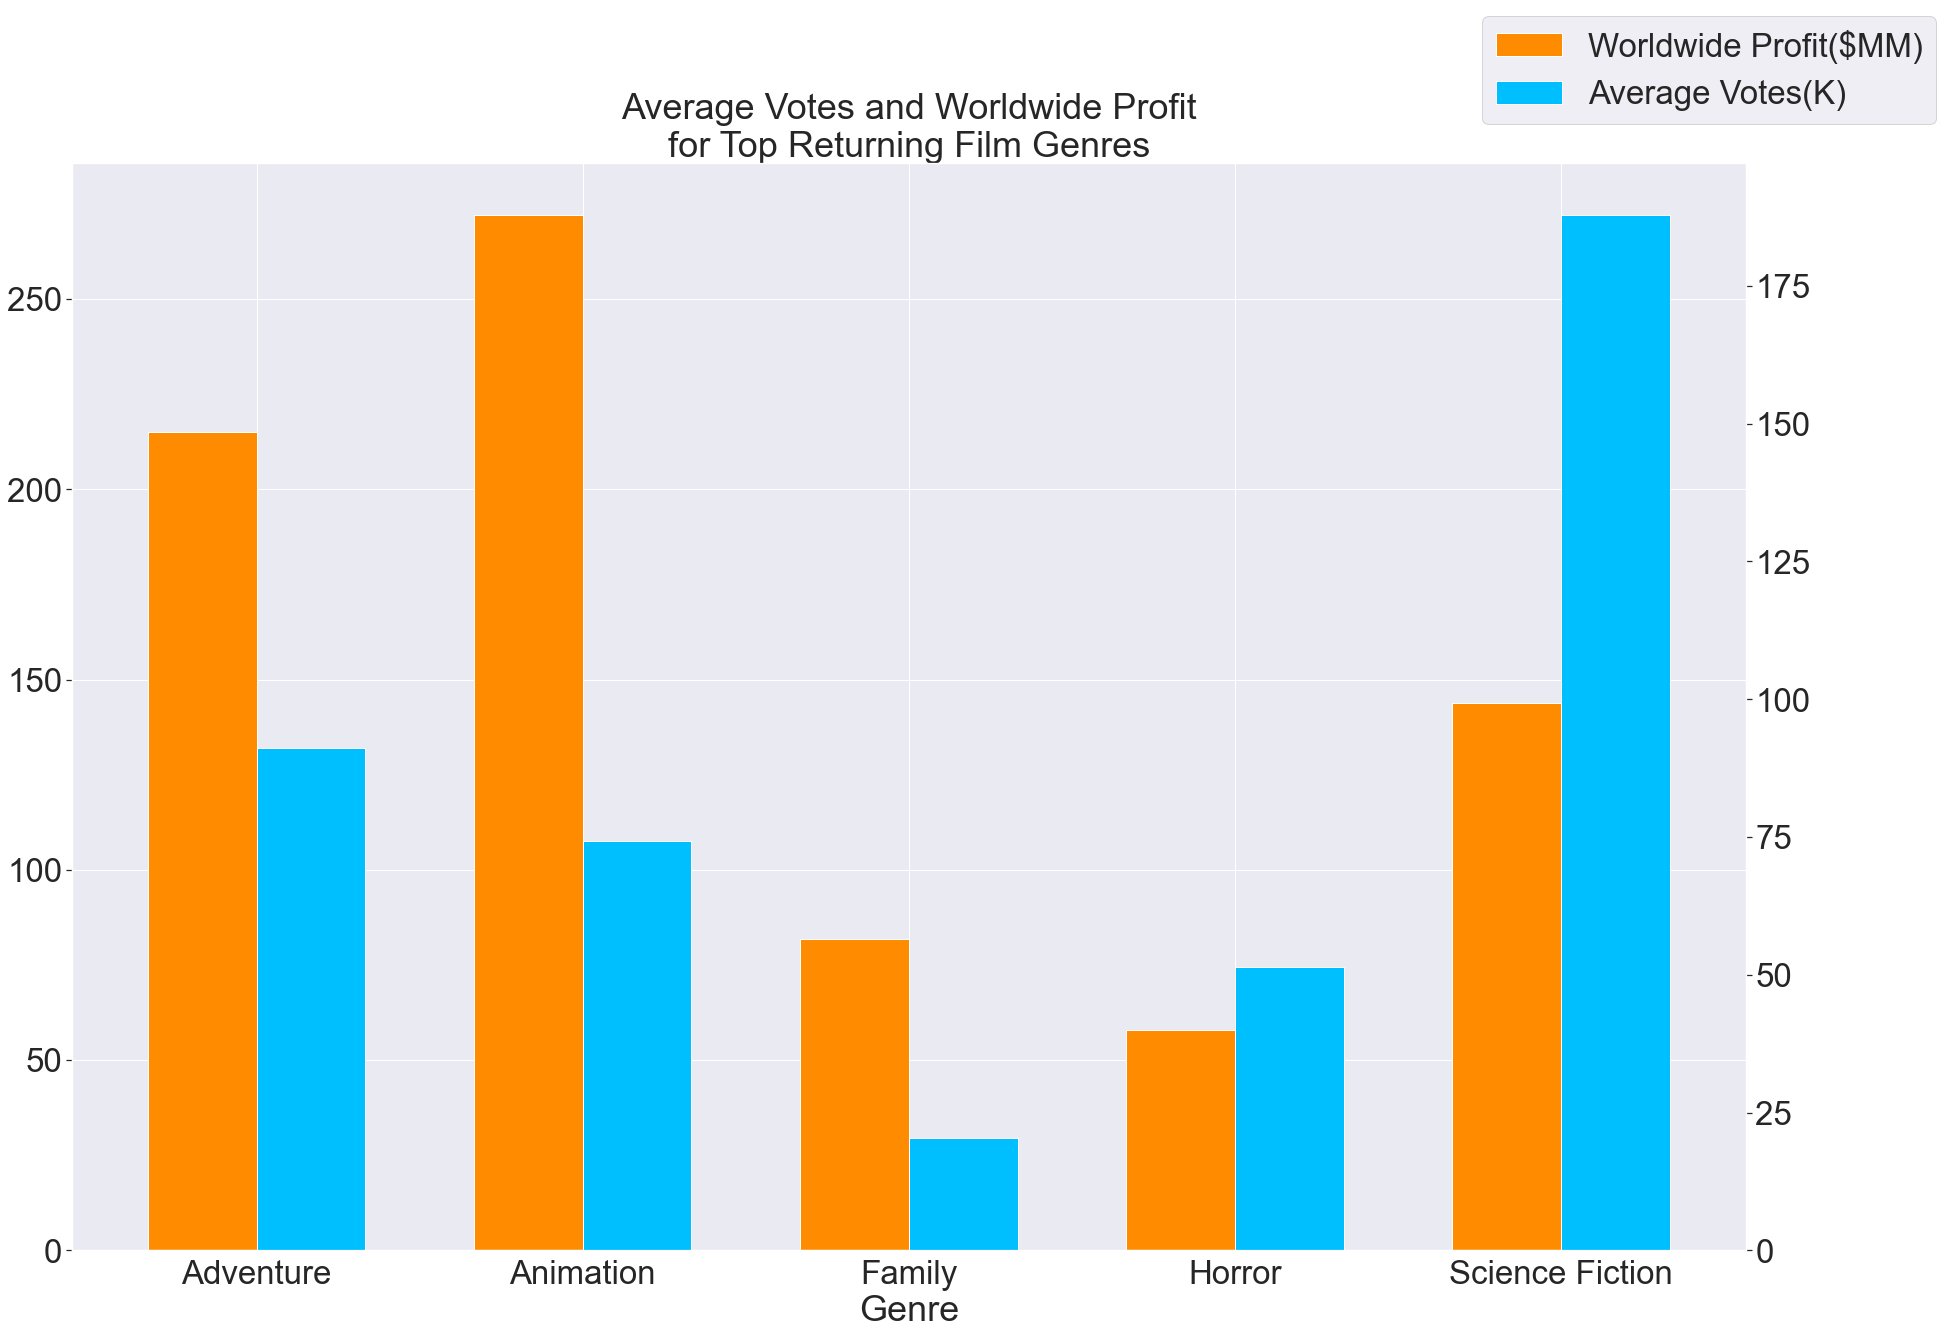

In [91]:
topfivegenresbywwgross = sortgenres.sort_values('profit_to_budget_ratio', ascending=False).head()
runtimeinfo = topfivegenresbywwgross['worldwide_gross'].sort_index()/1e6
numvoteinfo = topfivegenresbywwgross['numvotes'].sort_index()/1e3
indices = range(len(topfivegenresbywwgross))
genreinfo = topfivegenresbywwgross.sort_index().index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='darkorange', label='Worldwide Profit($MM)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='deepskyblue', label='Average Votes(K)')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
# ax1.set_ylabel('Average Worldwide Profit($MM)')
# ax2.set_ylabel('Average Number of Votes (Thousands)')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Profit\nfor Top Returning Film Genres')
# ax2.legend(loc=1)
# ax1.legend(loc=2)
fig.legend()
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(False)
plt.show()

In [64]:
sortsecondgenres = final_df.groupby('genre_1').mean().sort_values('profit_to_budget_ratio', ascending=False).head()
sortsecondgenres

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
genre_1,,,,,,,,,
Thriller,30091890.45802,39361412.55725,89549431.53435,104.10236,6.25159,121886.70635,2013.35878,59457541.07634,8.06962
Horror,22151282.05128,30400799.17949,74260940.51282,94.55263,5.52105,55365.26316,2013.66667,52109658.46154,6.65675
Mystery,32785714.28571,54142858.71429,131365212.33333,103.15000,6.34762,126591.00000,2013.38095,98579498.04762,6.64071
Documentary,8208333.33333,32991978.66667,42632207.16667,88.16667,6.95000,16338.16667,2012.50000,34423873.83333,5.31955
Animation,83919354.83871,124659307.35484,318426162.45161,95.38710,6.54333,106544.43333,2014.96774,234506807.61290,4.52276


<ipython-input-102-9280f9f329b4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


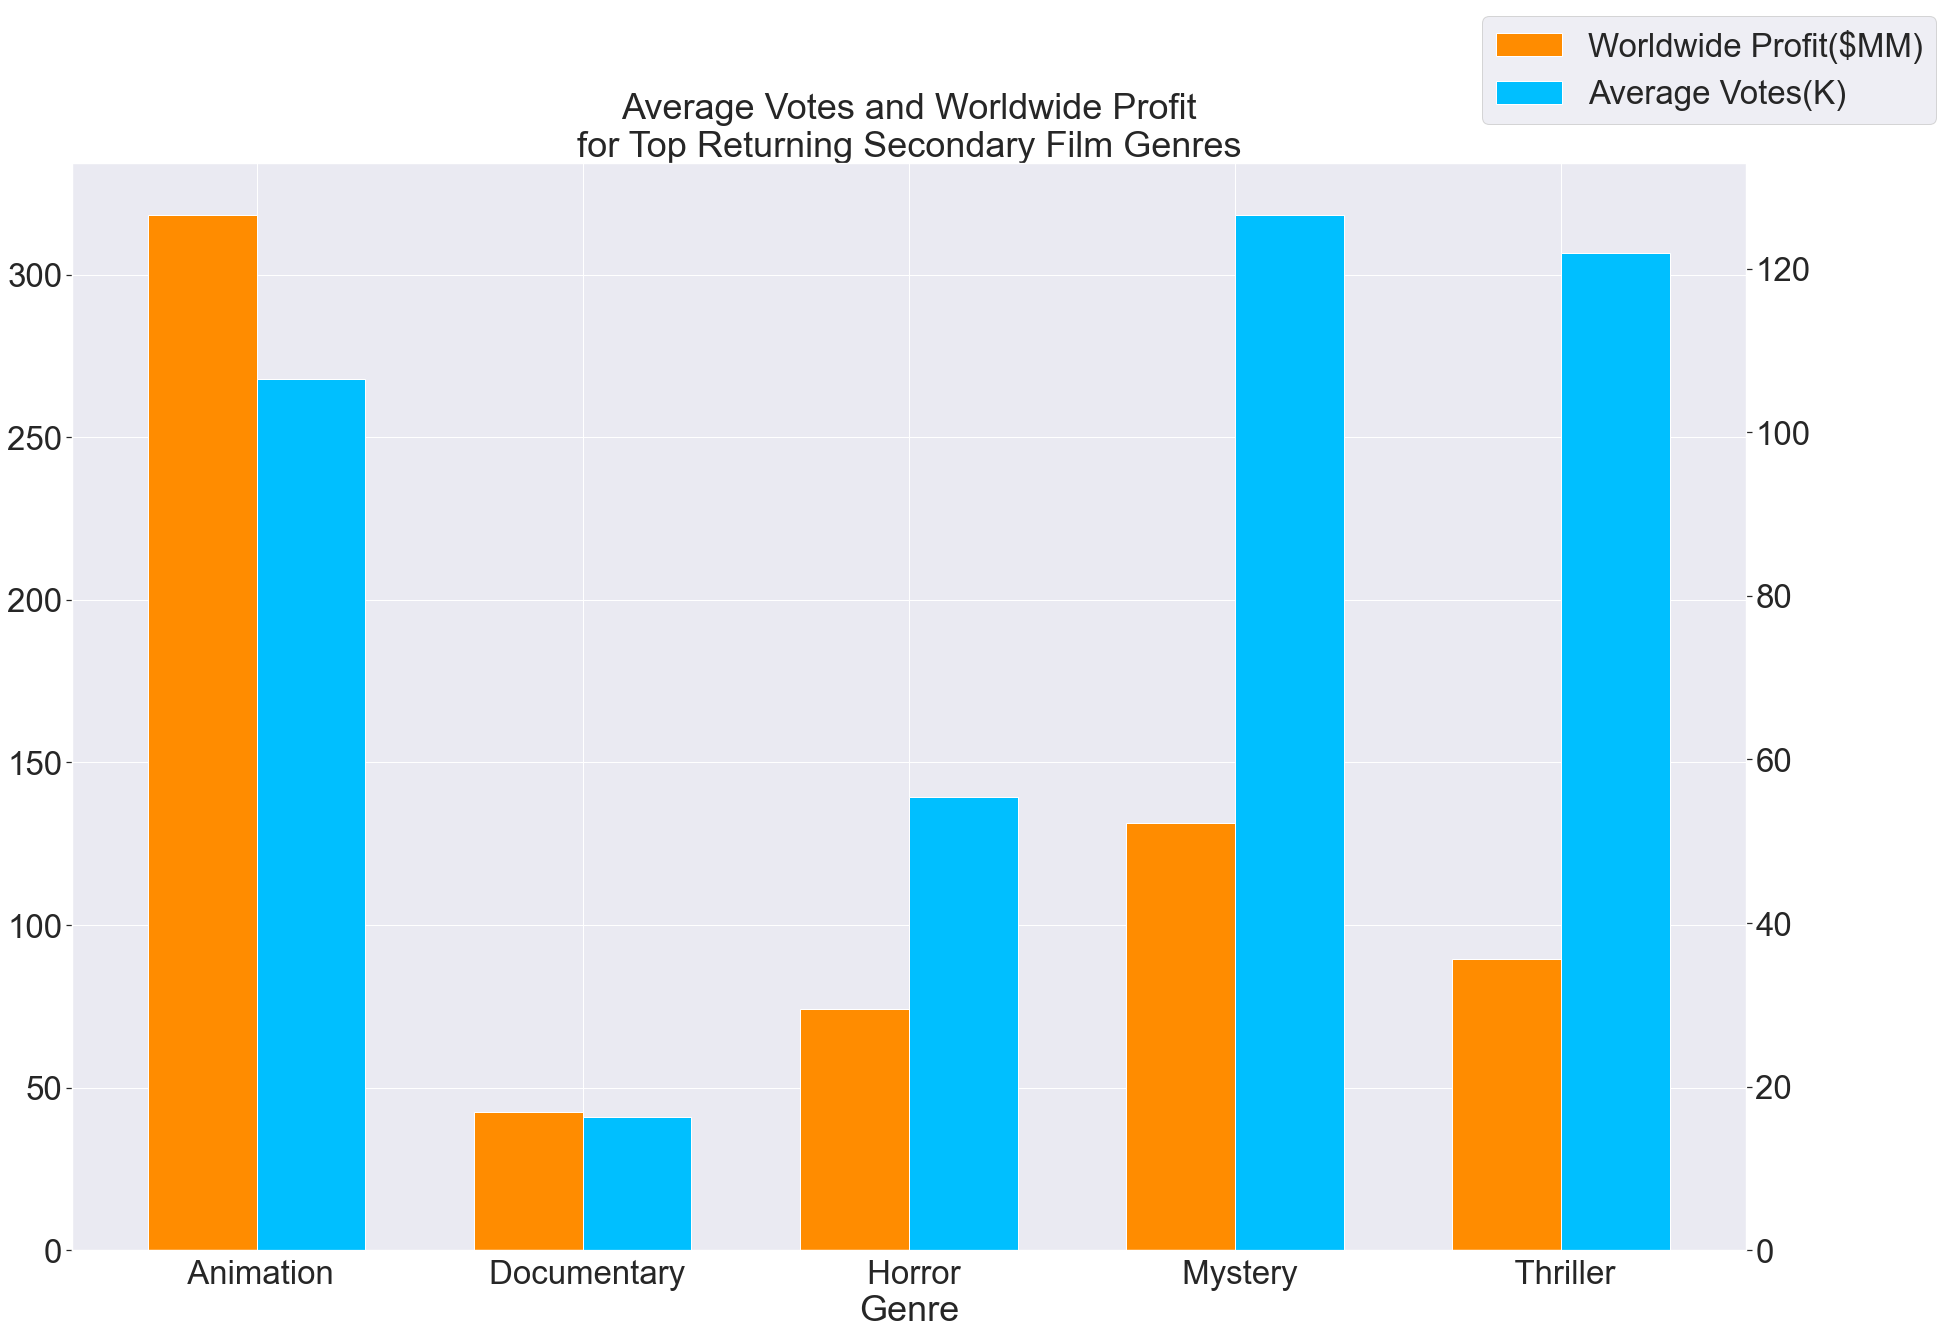

In [102]:
runtimeinfo = sortsecondgenres['worldwide_gross'].sort_index()/1e6
numvoteinfo = sortsecondgenres['numvotes'].sort_index()/1e3
indices = range(len(sortsecondgenres))
genreinfo = sortsecondgenres.sort_index().index
# Calculate optimal width
width = np.min(np.diff(indices))/3.
plt.rcParams.update({'font.size': 30})
sns.set(font_scale = 3)
fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='darkorange', label='Worldwide Profit($MM)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='deepskyblue', label='Average Votes(K)')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
# ax1.set_ylabel('Average Worldwide Profit($MM)')
# ax2.set_ylabel('Average Number of Votes(Thousands)')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Profit\nfor Top Returning Secondary Film Genres')
# ax1.legend(loc=2)
# ax2.legend(loc=0)
fig.legend()
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(False)
plt.show()

<ipython-input-71-c9562a008849>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


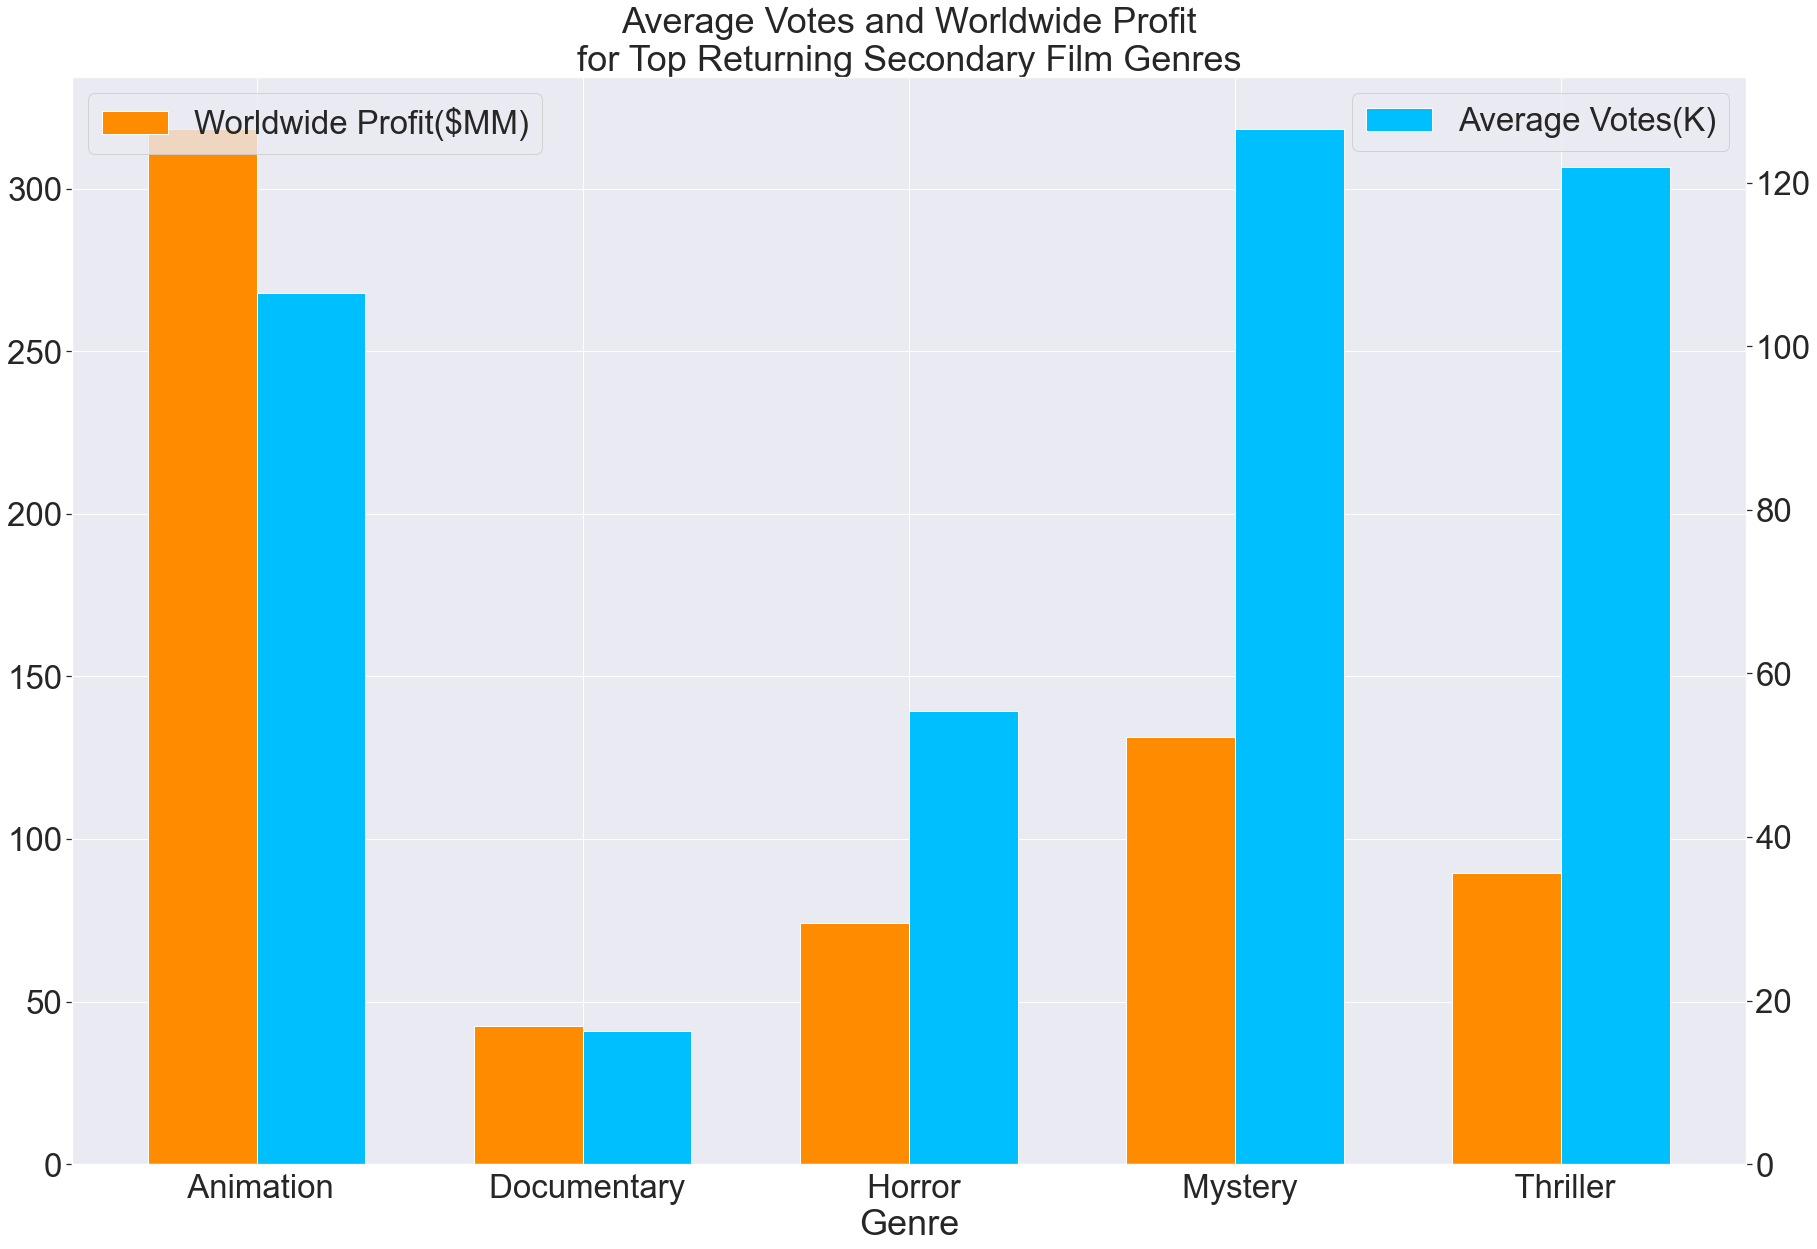

In [71]:
runtimeinfo = sortsecondgenres['worldwide_gross'].sort_index()/1e6
numvoteinfo = sortsecondgenres['numvotes'].sort_index()/1e3
indices = range(len(sortsecondgenres))
genreinfo = sortsecondgenres.sort_index().index
# Calculate optimal width
width = np.min(np.diff(indices))/3.
plt.rcParams.update({'font.size': 30})
# sns.set(font_scale = 2)
fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='darkorange', label='Worldwide Profit($MM)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='deepskyblue', label='Average Votes(K)')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
# ax1.set_ylabel('Average Worldwide Profit($MM)')
# ax2.set_ylabel('Average Number of Votes(Thousands)')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Profit\nfor Top Returning Secondary Film Genres')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(False)
plt.show()